# Банки — Анализ оттока клиентов

__Задача__<br>
Проанализировать клиентов банка и выделить сегменты клиентов, склонных к оттоку, подготовить рекомендации для отдела маркетинга по удержанию клиентов.

__Описание датасета__<br>
Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.

*Колонки:*

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности<br>
   / `equity` — количество баллов собственности
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` / `last_activity` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

__Шаги исследования__

1 Открыть файл с данными и изучить общую информацию.

2  Предобработка данных
<ul>2.1 Привести названия столбцов к змеиному регистру
<br>2.2 Привести столбцы к целочисленному типу
<br>2.3 Проверить данные на дубликаты
<br>2.4 Проанализировать пропуски
<br>2.5 Проанализировать выбросы
<br>2.6 Провести кодирование части данных</ul>

3  Исследовательский анализ данных
<ul>3.1  Сравнение портретов типичных клиентов (средние и медианы)
<ul>3.1.1 Сравнить средние и медианные значения в группах отточных и неотточных клиентов по признакам
<br>3.1.2 Построить графики и проанализировать различия в группах отточных и неотточных клиентов по признакам
<br>3.1.3 Сравнить портреты клиентов по признакам в разрере изучаемых признаков</ul>

3.2  Сравнить средний уровень оттока в целом по банку с уровнями оттока по признакам
<ul>3.2.1 Сравним средний уровень оттока в целом по банку с уровнями оттока по городам
<br>3.2.2 Сравним средний уровень оттока в целом по банку с уровнями оттока по полу
<br>3.2.3 Сравним средний уровень оттока в целом по банку с уровнями оттока по возрасту
<br>3.2.4 Сравним средний уровень оттока в целом по банку с уровнями оттока по количеству продуктов
<br>3.2.5 Сравним средний уровень оттока в целом по банку с уровнями оттока по количеству баллов собственности
</ul></ul>
<ul>3.3 Матрица корреляций</ul></ul>

4 Проверка статистических гипотез
<ul>4.1 Гипотеза о различии доходов у отточных и неотточных клиентов
<br>4.2 Гипотеза о различии долей клиентов с кредитной картой в оттоке и не в оттоке
</ul>
5  Промежуточные выводы о показателях, влияющих на отток

6  Сегментация клиентов и их приоритизация

7  Итоговые выводы и рекомендации для заказчика по каждому сегменту

__Ссылка на презентацию:__

https://disk.yandex.ru/i/zTAPNPQ79BYMqA

__Ссылка на дашборд:__ 

https://public.tableau.com/views/ChurnBank_16933896896140/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

## Открыть файл с данными и изучить общую информацию.

In [1]:
!pip install phik --quiet

In [2]:
# Импортируем библиотеки
import pandas as pd
from pandas.plotting import register_matplotlib_converters

import numpy as np
from numpy import median

import math as mth

import re

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

import seaborn as sns

import warnings; warnings.filterwarnings(action='ignore')

import scipy.stats as stats
from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest

import phik
from phik import resources, report

# убираем ограничения по столбцам и строкам
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# читаем файл
try:
    data = pd.read_csv('') 
except:
    data = pd.read_csv('')

In [4]:
# создадим функцию для посмотра содержимого таблицы, общей информации, количества пропусков, 
# описательной статистики и количества явных дубликатов
def general_info(df):
    display(df.head())
    print('___________________________')
    print('')
    display(df.info())
    print('___________________________')
    print('')
    display(df.isna().sum())
    print('___________________________')
    print('')
    display(df.describe())
    print('___________________________')
    print('')
    print('Количество дубликатов:', df.duplicated().sum())
    
# выведем на экран  
general_info(data)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1


___________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

___________________________



USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

___________________________



,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,"10,000.00","10,000.00","9,974.00","10,000.00","7,705.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"171,814.71",848.70,42.73,2.63,"827,794.31",1.87,0.68,0.52,"147,866.89",0.18
std,"33,708.24",65.45,12.18,1.98,"1,980,614.15",0.79,0.47,0.50,"139,388.51",0.39
min,"94,561.00",642.00,18.00,0.00,0.00,0.00,0.00,0.00,"2,546.30",0.00
25%,"142,810.25",802.00,33.00,0.00,"295,554.16",1.00,0.00,0.00,"75,251.90",0.00
50%,"172,728.00",853.00,40.00,3.00,"524,272.20",2.00,1.00,1.00,"119,658.10",0.00
75%,"201,261.75",900.00,51.00,4.00,"980,705.85",2.00,1.00,1.00,"174,500.54",0.00
max,"229,145.00","1,000.00",86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00


___________________________

Количество дубликатов: 0


Таблица состоит из 12 столбцов и содержит 10000 строк.
<br>В колонках `age` и `balance` обнаружены пропуски, их количество 26 и 2295 соответственно.
<br>Явные дубликаты отсутствуют.
<br>Кредитный скоринг находится в диапазоне от 642 до 1000. 
<br>Возрастной диапазон от 18 до 86 лет, средний и медиана варьируется от 40 до 43. 
<br>Бальный рейтинг собственности от 0 до 9. 
<br>Баланс на счёте от 0 до 119 113 552,01 руб., среднее значение и медиана координально отличаются, что свидетельствует о значительных выбросах. 
<br>Диапазон по количеству продуктов от 0 до 5.
<br>Заработная плата от 2546,30 до 1 395 064,45 руб., среднее значение и медиана также значительно отличаются.

На этапе предобработки мы:
- приведем названия столбцов `USERID` и `EST_SALARY` к змеиному регистру;
- приведем столбцы `age` и `score` к целочисленному типу;
- проверим данные на неявные дубликаты;
- проведем анализ пропусков в столбцах  `age` и `balance`;
- проанализируем выбросы;
- проведем кодирование столбцов `gender` и `city` к бинарным значениям.

## Предобработка данных

### Приведем названия столбцов к змеиному регистру

In [5]:
data = data.rename(columns={'USERID':'user_id', 'EST_SALARY':'est_salary'})
data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

### Приведем столбцы к целочисленному типу

In [6]:
data['age'] = data['age'].astype('Int64') 
data['score'] = data['score'].astype('Int64') 
data.dtypes

user_id            int64
score              Int64
city              object
gender            object
age                Int64
equity             int64
balance          float64
products           int64
credit_card        int64
last_activity      int64
est_salary       float64
churn              int64
dtype: object

### Проверим данные на неявные дубликаты

In [7]:
# поищем дубликаты по ключевым столбцам и удалим их, если они есть
data.loc[data.duplicated(subset=['user_id', 'city'], keep=False)]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


Неявные дубликаты отсутствуют. По `user_id` могут быть клиенты с одинаковыми id, поэтому искали в паре с городом. Если в данной паре столбцов дубликаты отсутствуют, значит это разные клиенты.

### Проведем анализ пропусков

In [8]:
# посмотрим на пропущенные значения в столбце age
data[data['age'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932,Ярославль,М,<NA>,5,"7,601,719.20",2,1,1,"408,121.16",0
2165,187635,692,Рыбинск,Ж,<NA>,0,NaN,1,1,1,"160,368.82",0
2444,221156,913,Ярославль,М,<NA>,0,NaN,1,1,1,"135,693.24",0
3091,138660,836,Ростов,Ж,<NA>,5,"294,315.53",2,0,1,"63,310.22",1
4912,210674,834,Рыбинск,М,<NA>,1,"238,330.52",2,0,1,"93,775.06",0
5470,218868,827,Рыбинск,Ж,<NA>,4,"448,959.07",2,1,1,"67,835.95",0
5495,151662,884,Рыбинск,Ж,<NA>,0,NaN,1,1,1,"137,500.77",0
7236,210135,908,Рыбинск,Ж,<NA>,4,"1,120,340.31",3,1,1,"85,002.15",0
7248,219343,920,Рыбинск,Ж,<NA>,0,NaN,1,1,0,"159,248.67",0
7345,184913,829,Ярославль,Ж,<NA>,3,"188,648.77",2,0,1,"75,206.90",0


Их не так много, менее 0,5%, поэтому удалим, на анализ не повлияют.

In [9]:
# удаляем пропуски и сбрасываем индексы
data.dropna(subset=['age'], inplace=True)
data.reset_index(drop= True , inplace= True)
print('Количество пропусков в столбце возраст', data['age'].isna().sum())

Количество пропусков в столбце возраст 0


Проанализируем пропуски в столбце `balance`, их достаточно много порядка 23%. Удалить мы их не можем, т.к. это может повлиять на дальнейший анализ. Есть предположение, что это дебетовый счет, который для открытия не обязателен. Исследуем природу пропусков.

In [10]:
# посмотрим на связь пропусков в столбце balance с оттоком клиентов
data[data['balance'].isna()]['churn'].value_counts()

0    2266
1      13
Name: churn, dtype: int64

Только 0,5% отточных. Малая доля отточных это первый признак, указывающий на наше предположение о дебетовом счете.

In [11]:
# сравним статистические показатели в частях датасета с пропусками в столбеце balance и без
display(data[data['balance'].isna()].describe().T)
data[(data['balance'].isna() == False)].describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,"2,279.00","171,904.89","33,303.22","114,182.00","142,992.50","172,304.00","201,257.00","229,145.00"
score,"2,279.00",865.36,89.55,642.00,871.00,903.00,922.00,990.00
age,"2,279.00",42.09,11.94,18.00,33.00,40.00,49.00,86.00
equity,"2,279.00",0.05,0.23,0.00,0.00,0.00,0.00,3.00
balance,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
products,"2,279.00",1.16,0.40,0.00,1.00,1.00,1.00,3.00
credit_card,"2,279.00",0.82,0.39,0.00,1.00,1.00,1.00,1.00
last_activity,"2,279.00",0.55,0.50,0.00,0.00,1.00,1.00,1.00
est_salary,"2,279.00","226,345.42","199,825.59","20,274.03","120,217.39","174,347.87","240,372.78","1,333,687.36"
churn,"2,279.00",0.01,0.08,0.00,0.00,0.00,0.00,1.00


,count,mean,std,min,25%,50%,75%,max
user_id,"7,695.00","171,710.89","33,812.86","94,561.00","142,638.00","172,710.00","201,145.50","229,136.00"
score,"7,695.00",843.74,55.34,689.00,801.00,840.00,882.00,"1,000.00"
age,"7,695.00",42.92,12.24,18.00,33.00,40.00,52.00,86.00
equity,"7,695.00",3.39,1.58,0.00,2.00,4.00,5.00,9.00
balance,"7,695.00","827,245.59","1,980,327.41",0.00,"295,698.71","524,295.33","980,051.21","119,113,552.01"
products,"7,695.00",2.08,0.76,1.00,2.00,2.00,2.00,5.00
credit_card,"7,695.00",0.64,0.48,0.00,0.00,1.00,1.00,1.00
last_activity,"7,695.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
est_salary,"7,695.00","124,520.39","104,667.11","2,546.30","67,556.98","106,250.18","155,144.60","1,395,064.45"
churn,"7,695.00",0.23,0.42,0.00,0.00,0.00,0.00,1.00


Из сравнения мы видим, что у строк с пропусками скоринг и зарплата выше, баллы собственноси практически отсутствуют, и пульзуются меньшим количеством продуктов. 

Визуализируем данные с пропусками по увиденным признакам.

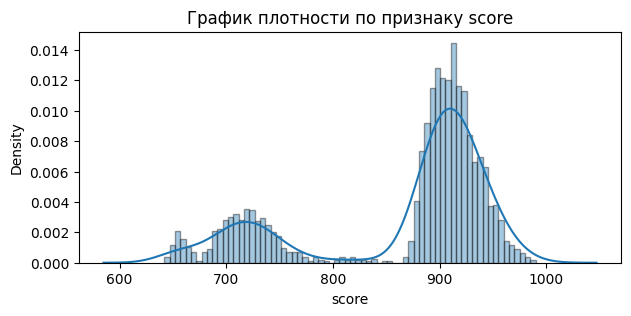

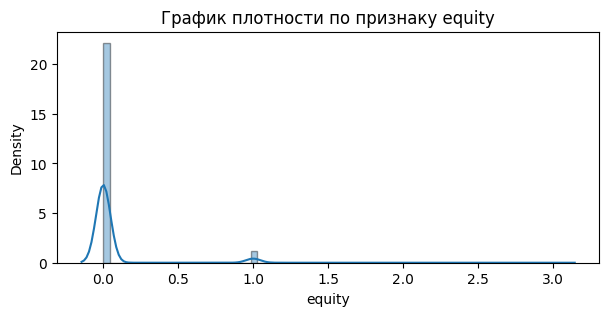

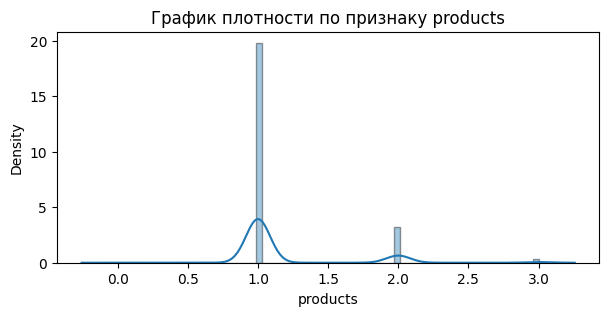

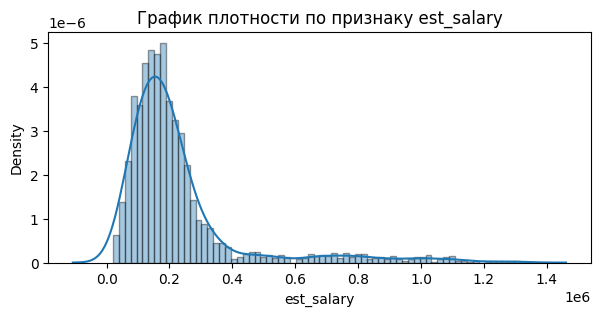

In [12]:
# создаем таблицу с пропусками в столбце balance
nan_balance = data.query('balance.isna()')

# с помощью цикла построим ряд гистограмм по признакам    
for col in ['score', 'equity', 'products', 'est_salary']:
    plt.rcParams["figure.figsize"] = [7,3]
    sns.distplot(nan_balance[col], hist=True,  bins=70, hist_kws={'edgecolor':'black'})
    plt.title(f'График плотности по признаку {col}')
    plt.show()

Из увиденного пропуски в балансе не случайны, имеют следующую взаимосвязь:
- у клиентов со скориногом в диапазоне 780-880 в основном пропуски отсутствуют;
- пропуски присутствуют только у клиентов с 0 или 1 рейтингом собственности;
- у клиентов с 3-4 продуктами пропуски отсутствуют.

Это говорит нам о том, что у клиентов практически нет никакой собственности, а соответственно и нет накоплений. Они пользуются простыми продуктами для удовлетворения своих ежедневных или мелких потребностей. Также доказывает теорию о дебетовом счете, если нет накоплений, то зачем открывать счет.

In [13]:
# с помощью цикла посмотрим распредление пропусков по городу, полу, наличию кредитной карты и активности
for col in ['city','gender','credit_card','last_activity']:
    print('Распределение по', col)
    print()
    print(nan_balance[col].value_counts(normalize=True))
    print('-------------------------') 
    print()

Распределение по city

Ярославль   0.64
Рыбинск     0.26
Ростов      0.10
Name: city, dtype: float64
-------------------------

Распределение по gender

М   0.56
Ж   0.44
Name: gender, dtype: float64
-------------------------

Распределение по credit_card

1   0.82
0   0.18
Name: credit_card, dtype: float64
-------------------------

Распределение по last_activity

1   0.55
0   0.45
Name: last_activity, dtype: float64
-------------------------



Из увиденного больше всего пропусков у клиентов:
- из Ярославля (64%);
- мужского пола (56%);
- имеющих кредитную карту (82%); 
- по большей части активных (55%). 

In [14]:
# посмотрим на нулевые балансы в столбце balance
data.query('balance == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3896,179831,730,Ярославль,М,18,0,0.00,2,1,1,"64,548.33",0
6750,148456,813,Ярославль,М,20,2,0.00,2,1,0,"23,876.51",0


Имеется 2 нулевых баланса у неушедших клиентов, имеющих несколько кредитных продуктов, кредитную карту и низкий бал собственности, либо его отсутствие. Данные счета были открыты с вероятностью менеджерами банка клиентам для гашения кредита либо для личного пользования. 
<br>Также это продолжает подтверждать нашу теорию о дебетовом счете (о его добровольном открытии). 
Поэтому, пропуски заполнить не можем, но создадим столбец `debit`, который заполним 1, если есть информация о балансе в столбце `balance` и 0, если NaN.

In [15]:
omissions = data['balance'].isna()
data['debit'] = np.where(omissions, 0, 1)
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,debit
0,183012,850,Рыбинск,Ж,25,1,"59,214.82",2,0,1,"75,719.14",1,1
1,146556,861,Рыбинск,Ж,37,5,"850,594.33",3,1,0,"86,621.77",0,1
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.34",0,0
3,225363,866,Ярославль,Ж,51,5,"1,524,746.26",2,0,1,"174,423.53",1,1
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,"67,353.16",1,1


### Проанализируем выбросы

Диапазон по количеству продуктов от 0 до 5, значит в таблице есть клиенты, которые не пользуются продуктами банка, чего быть не должно, т.к. если человек является клиентом, то у него должен быть хоть 1 продукт. Посмотрим, сколько таких?

In [16]:
data.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,debit
8939,147837,962,Рыбинск,Ж,79,3,NaN,0,0,0,"25,063.96",1,0


Только одна строка, нет ни продуктов, ни кредитной карты и нет активности. Данный клиент ушел из банка. Удалим эту строку, т.к. для анализа нам нужны данные, когда отточные еще были клиентами банка.

In [17]:
# удалим строку и сбросим индексы
data = data.query('products != 0')
data.reset_index(drop= True , inplace= True)
data['products'].value_counts()

2    5119
1    3323
3    1038
4     474
5      19
Name: products, dtype: int64

Посмотрим на выбросы в столбцах `balance` и `est_salary`.

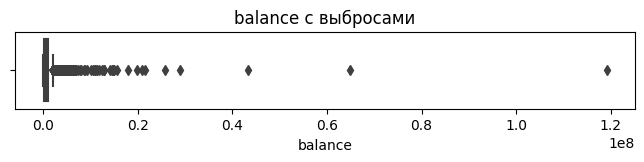

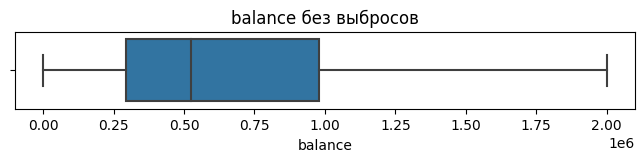

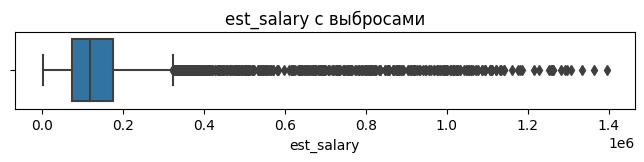

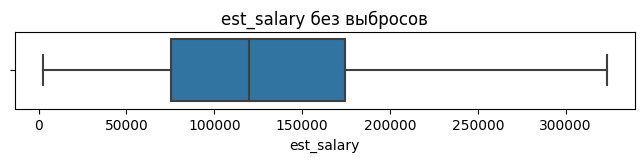

In [18]:
# строим диаграммы размаха с выбросами и без для столбцов balance и est_salary с помощью цикла
for col in ['balance', 'est_salary']:    
    plt.figure(figsize=(8,1))
    sns.boxplot(data=data, x=col)
    plt.title(f'{col} с выбросами')
    
    plt.figure(figsize=(8,1))
    sns.boxplot(data=data, x=col, showfliers=False)
    plt.title(f'{col} без выбросов')
    plt.show();

Из диаграмм видим видим выбросы по балансу счета и по заработной плате. Посмотрим на их количество и процент от общего датасета. Для этого сделаем срез данных по столбцам `balance` больше 2 млн.руб. и `est_salary` больше 350 тыс.руб.

In [19]:
print('Количество клиентов с выбросами -', len(data.query('balance > 2000000 or est_salary > 350000')))
print('Процент выбросов из всего датасета -', 
      round((len(data.query('balance > 2000000 or est_salary > 350000'))/len(data)*100),2))

Количество клиентов с выбросами - 733
Процент выбросов из всего датасета - 7.35


Получилось 7.35% выбросов от всего датасета. Удалять не будем, считаем их vip-клиентами, у которых высокий заработок и сбережения, в дальнейшем исследуем.

### Проведем кодирование части данных

Закодируем столбцы `gender` и `city`, переведем их в бинарные значения.

In [20]:
# скопируем столбцы gender и city
data['gender_2'] = data['gender']
data['city_2'] = data['city']

# копии столбцов разбиваем по половым признакам и по городам
data = pd.get_dummies(data, columns = ['gender_2', 'city_2'])

# переименуем получившиеся столбцы и выведем на экран
data = data.rename(columns = ({'gender_2_Ж':'female', 'gender_2_М':'male', 
                               'city_2_Ростов':'Ростов', 'city_2_Рыбинск':'Рыбинск',
                               'city_2_Ярославль':'Ярославль'}))
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,debit,female,male,Ростов,Рыбинск,Ярославль
0,183012,850,Рыбинск,Ж,25,1,"59,214.82",2,0,1,"75,719.14",1,1,1,0,0,1,0
1,146556,861,Рыбинск,Ж,37,5,"850,594.33",3,1,0,"86,621.77",0,1,1,0,0,1,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.34",0,0,1,0,0,1,0
3,225363,866,Ярославль,Ж,51,5,"1,524,746.26",2,0,1,"174,423.53",1,1,1,0,0,0,1
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,"67,353.16",1,1,0,1,0,0,1


В результате предобработки мы:

- привели названия столбцов к змеиному регистру;
- привели столбцы `age` и `score` к целочисленному типу;
- проверили данные на неявные дубликаты;
- проанализировали пропуски, в столбце  `age` удалили, а в столбце `balance` оставили, т.к. считаем, что это дебетовый счет, который необязателен к открытию, а также создали дополнительный столбец `debit` с бинарными значениями по наличию/ отсутствию данного счета;
- посмотрели выбросы, оставили их, в исследовательском анализе проанализируем их отдельно;
- провели кодирование столбцов `gender` и `city`, путем копирования этих столбцов, приведения к бинарным значениям содержимого с разбитием их на отдельные столбцы.

## Исследовательский анализ данных

### Сравнение портретов типичных клиентов

#### Посмотрим средние и медианные значения в группах отточных и неотточных клиентов  по признакам

В начале посмотрим на общий портрет клиентов банка.

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,"9,973.00","171,757.62","33,696.37","94,561.00","142,757.00","172,651.00","201,164.00","229,145.00"
score,"9,973.00",848.67,65.39,642.00,802.00,853.00,900.00,"1,000.00"
age,"9,973.00",42.73,12.18,18.00,33.00,40.00,51.00,86.00
equity,"9,973.00",2.63,1.98,0.00,0.00,3.00,4.00,9.00
balance,"7,695.00","827,245.59","1,980,327.41",0.00,"295,698.71","524,295.33","980,051.21","119,113,552.01"
products,"9,973.00",1.87,0.79,1.00,1.00,2.00,2.00,5.00
credit_card,"9,973.00",0.68,0.47,0.00,0.00,1.00,1.00,1.00
last_activity,"9,973.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
est_salary,"9,973.00","147,799.12","139,287.08","2,546.30","75,252.02","119,643.06","174,499.96","1,395,064.45"
churn,"9,973.00",0.18,0.39,0.00,0.00,0.00,0.00,1.00


__Клиенты банка это:__

- Мужчины и женщины в равных долях.
- Средний созраст 42 года.
- Преимущественно из Ярославля (59%), из Рыбенска 27%, из Ростова 14%.
- Средний скоринг 848.
- Со средним рейтингом собственности 2-3 балла.
- Пользующиеся 1-2 продуктами и преимущественно имеющими кредитные карты (68%).
- Преимущественно с имеющемся дебетовым счетом (77%) и балансом на нем в среднем 524 т.р.
- Средне активные (52%).
- Со средним доходом 119 т.р.

In [22]:
# удалим столбец user_id, сгруппируем данные по оттоку 
# и выведем средние и медианные значения по оставшимся столбцам датасета 
data.drop(['user_id'], axis=1).groupby('churn').agg(['mean', 'median']).T

churn                         0            1
score         mean       845.40       863.36
              median     848.00       866.00
age           mean        43.02        41.43
              median      40.00        39.00
equity        mean         2.38         3.76
              median          3            4
balance       mean   733,031.63 1,134,458.21
              median 475,410.09   783,908.90
products      mean         1.76         2.38
              median          2            2
credit_card   mean         0.71         0.55
              median          1            1
last_activity mean         0.48         0.70
              median          0            1
est_salary    mean   147,674.64   148,357.48
              median 118,227.60   125,408.88
debit         mean         0.72         0.99
              median          1            1
female        mean         0.53         0.35
              median          1            0
male          mean         0.47         0.65
              median          0            1
Ростов        mean         0.14         0.15
              median          0            0
Рыбинск       mean         0.28         0.24
              median          0            0
Ярославль     mean         0.58         0.61
              median          1            1

Что видим:

- К оттоку склонны клиенты мужского пола больше, чем женского.
- В разрезе города самая высокая отточность в Ярославле (61%).
- Клиенты более старшего возраста менее отточны (средний 43 года против 41).
- Клиенты, у которых выше рейтинг баллов собственности склоннее к оттоку.
- Скоринговый рейтинг у отточных клиентов немного выше, чем у оставшихся в банке (863 против 845).
- У отточных клиентов баланс счета выше более, чем в 1,5 раза по сравнению с неотточными (784 тыс. руб. против 475 тыс.руб.).
- Меньше склонны к оттоку клиенты с большим количеством продуктов.
- Имеющие кредитную карту менее отточны.
- Клиенты, посещающие банк, более отточны.
- По заработку отличие незначительное, но у отточных зарплата выше в среднем на 7 тыс.руб.
- Клиенты, имеющие дебетовый счет, более отточны.

Ранее мы выделили vip-клиентов с балансов счета больше 2 млн.руб. и зарплатой больше 350 тыс.руб. Проанализируем их тоже по тому же принципу.

In [23]:
(
    data.query('balance > 2000000 or est_salary > 350000')
    .drop(['user_id'], axis=1).groupby('churn')
    .agg(['mean', 'median']).T
)

churn                           0            1
score         mean         891.59       916.27
              median       922.00       918.50
age           mean          44.68        42.79
              median        42.00        40.00
equity        mean           2.08         4.31
              median            1            4
balance       mean   4,487,998.07 3,695,738.56
              median 2,824,865.88 2,664,421.66
products      mean           1.68         2.69
              median            2            2
credit_card   mean           0.68         0.41
              median            1            0
last_activity mean           0.46         0.71
              median            0            1
est_salary    mean     538,297.27   324,619.63
              median   466,077.94   231,778.05
debit         mean           0.49         0.99
              median            0            1
female        mean           0.46         0.24
              median            0            0
male          mean           0.54         0.76
              median            1            1
Ростов        mean           0.05         0.09
              median            0            0
Рыбинск       mean           0.22         0.20
              median            0            0
Ярославль     mean           0.74         0.72
              median            1            1

Какие существенные отличия видим у vip-клиенов по сравнению с предыдущими выводами:

- Скоринговый средний рейтинг у отточных клиентов выше, чем у оставшихся в банке (916 против 891).
- У отточных клиентов баланс счета ниже на 1% по сравнению с неотточными (2,8 млн. руб. против 2,6 млн.руб.).
- У отточных зарплата ниже в 2 раза (231 тыс. руб. против 466 тыс.руб.).

#### Построим графики и посмотрим на различия в группах отточных и неотточных клиентов по признакам

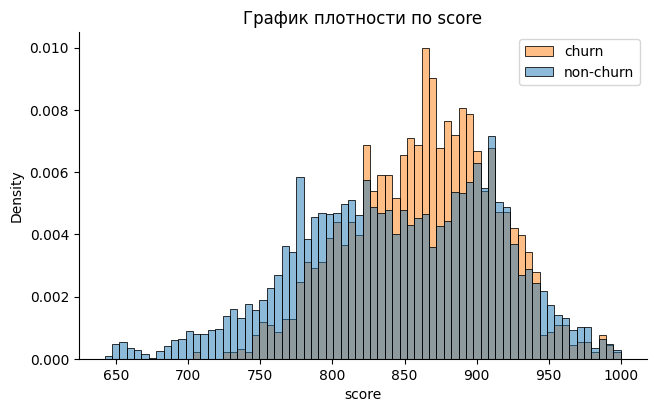

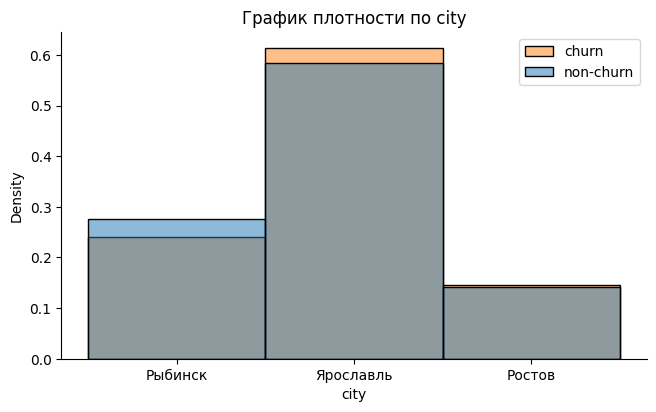

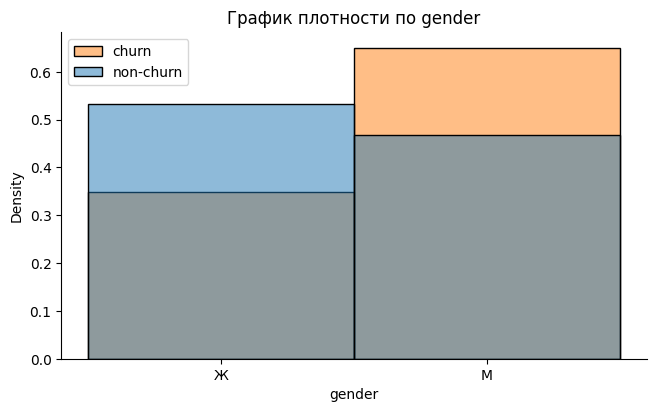

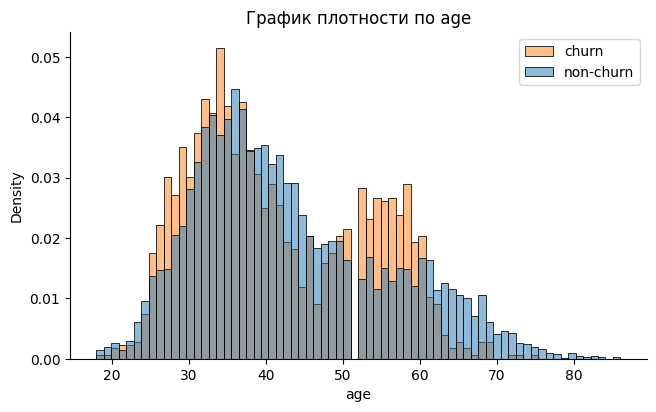

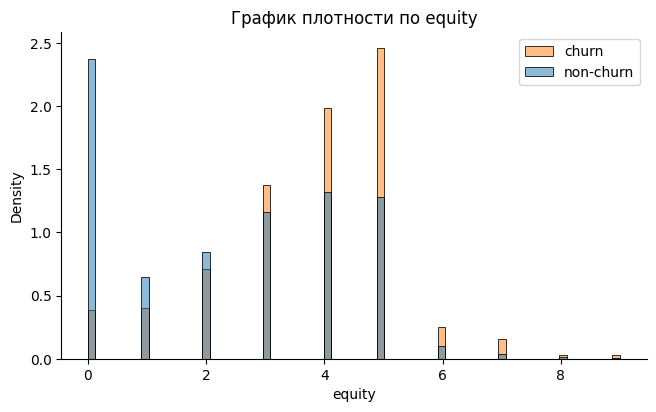

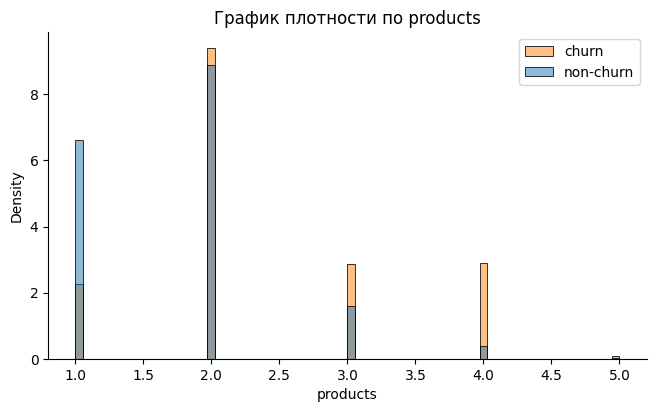

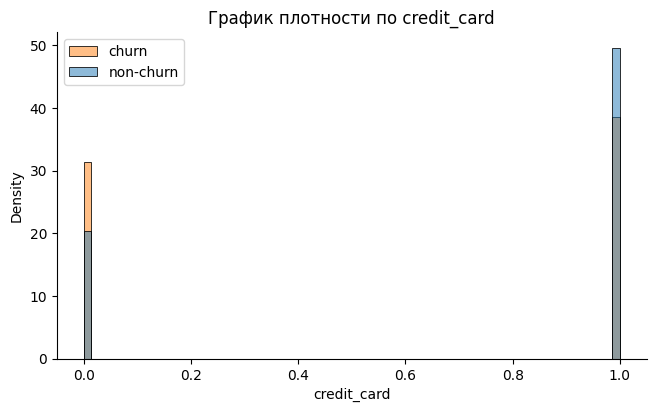

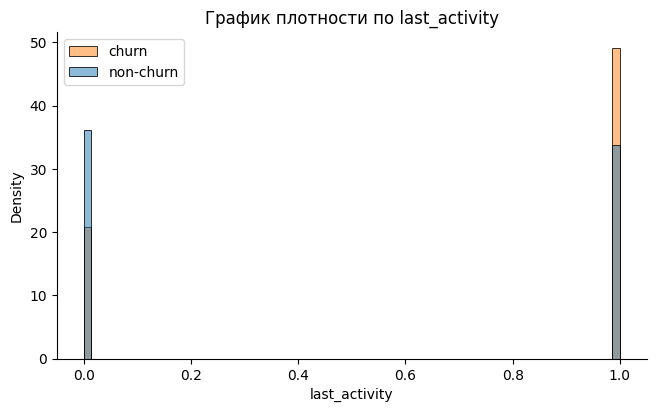

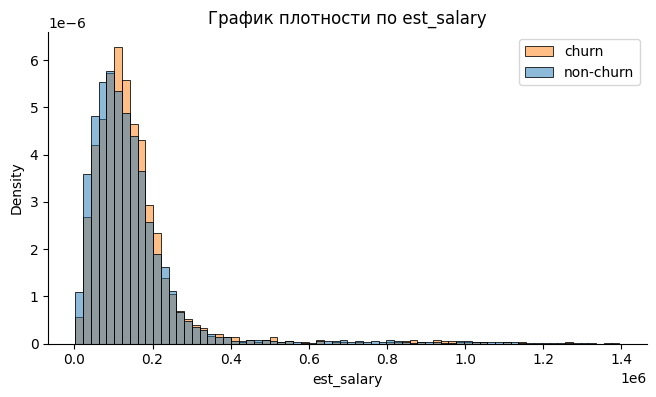

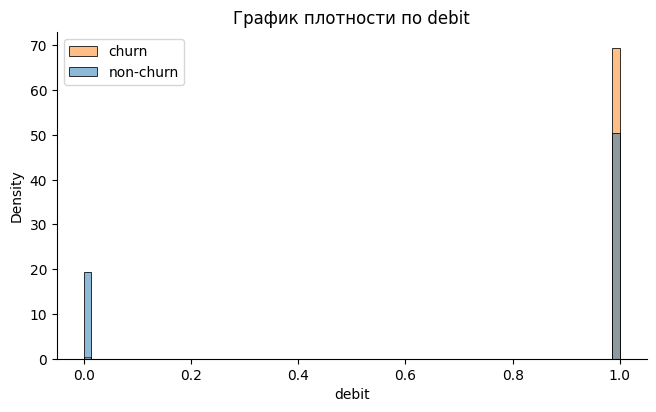

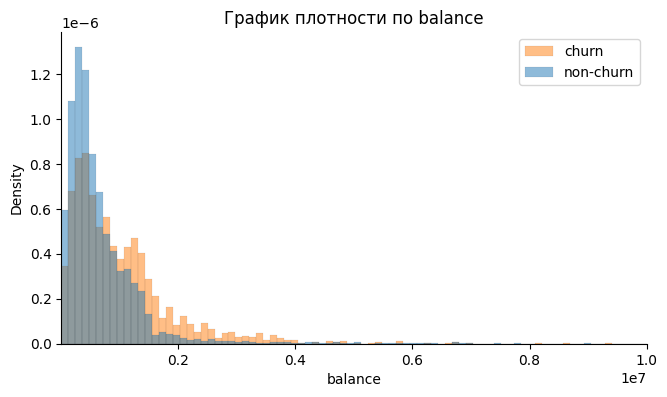

In [24]:
columns = data.drop(['user_id', 'churn', 'balance', 'female', 
                     'male', 'Ростов', 'Рыбинск', 'Ярославль'], axis=1).columns
# с помощью цикла построим ряд гистограмм отточных и неотточных клиентов по признакам
for col in columns:
    sns.displot(x=col, bins=70,
                hue='churn',
                kde=False, 
                stat="density",
                common_norm=False,
                data=data,
                legend=False, height=4, aspect=5/3)
    plt.legend(labels=['churn', 'non-churn'])
    plt.title(f'График плотности по {col}', fontsize=12) 
    plt.show();

# построим гистограмму по признаку balance
sns.displot(x='balance', 
            bins=1000,
            hue='churn',
            kde=False, 
            stat="density",
            common_norm=False,
            data=data,
            legend=False, height=4, aspect=5/3)
plt.xlim([3000, 10000000])
plt.legend(labels=['churn', 'non-churn'])
plt.title(f'График плотности по balance', fontsize=12) 
plt.show();  

Из графиков видим, что отточнее клиенты:

- С достаточно высокими скоринговыми рейтингами (820-900 и 930-945).
- Преимущественно из филиалов Яроставля и Ростова.
- Мужского пола.
- В возрасте 26-35 и 50-61 лет.
- С высоким рейтингом собственности, 3-9 баллов.
- С высоким балансом счета, от 700 тыс. руб. и выше.
- Имеющие большее количество продуктов, от 2 до 4.
- Неимеющие кредитную карту.
- Посещающие банк.
- С зарплатой от 100 до 220 тыс.руб.
- Имеющие дебетовый счет.

Построим и проанализируем такие же графики и для vip-клиентов.

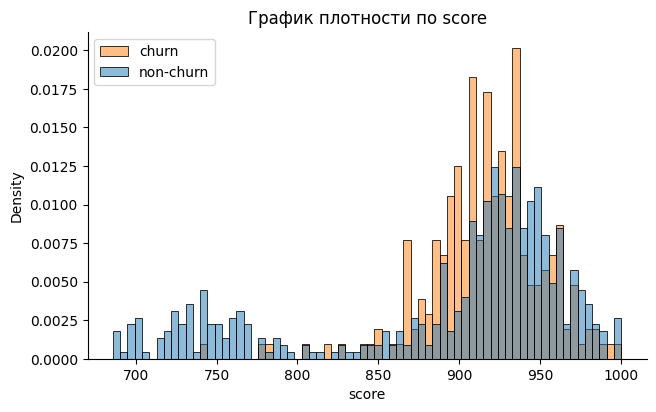

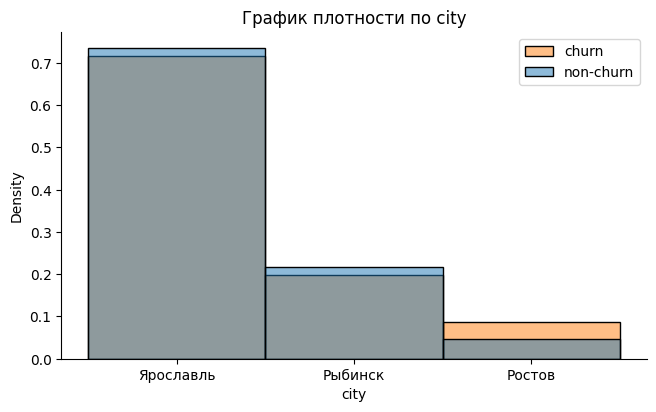

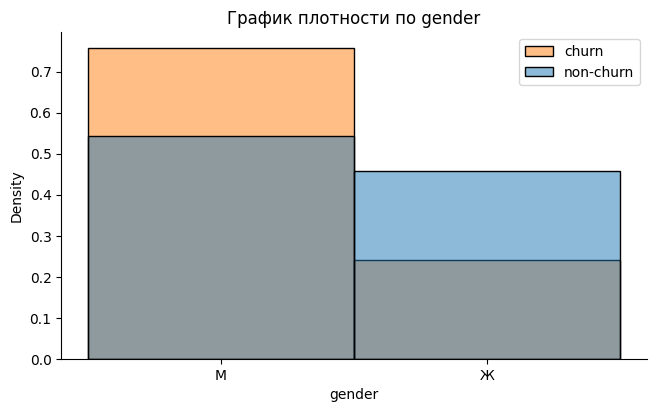

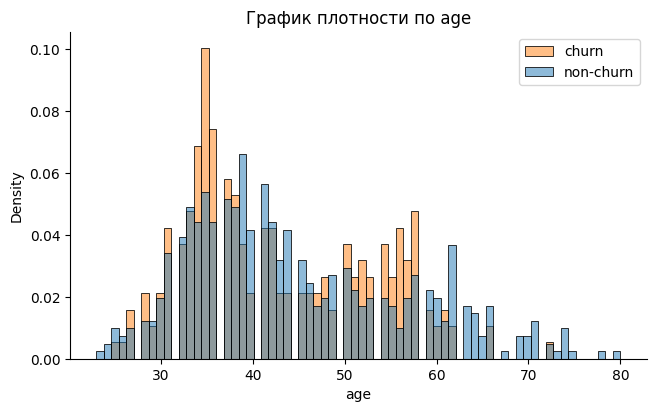

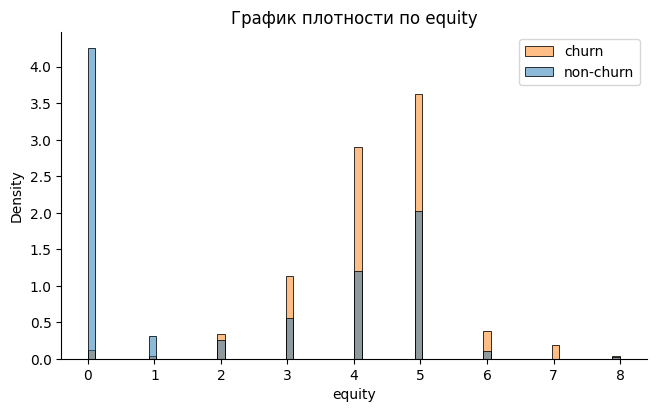

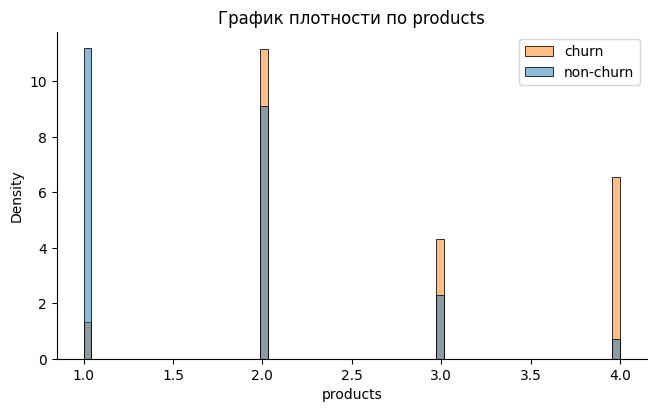

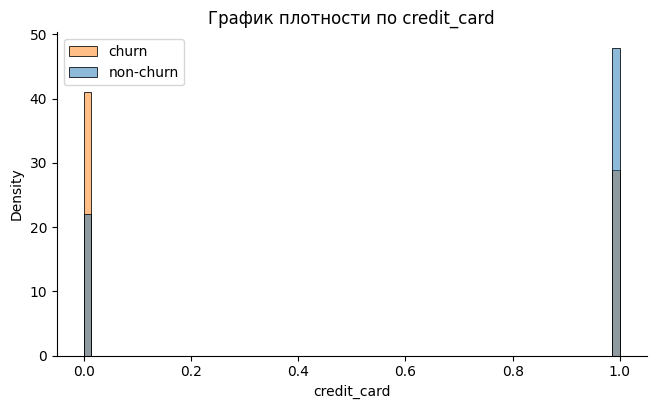

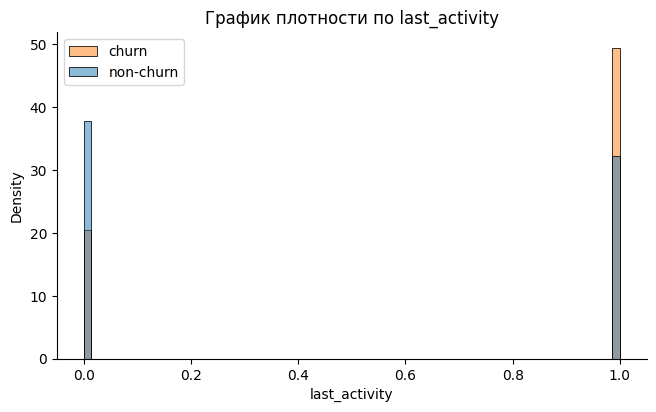

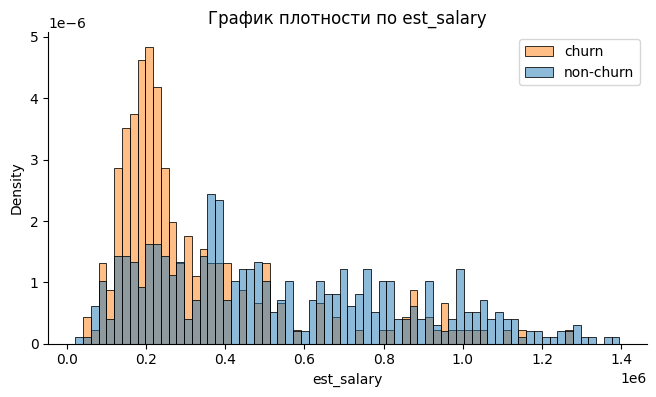

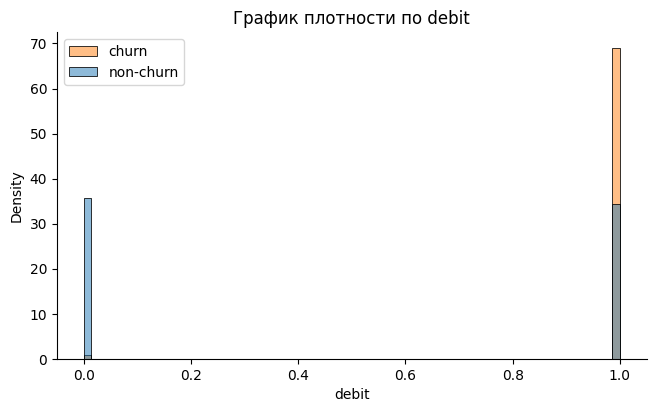

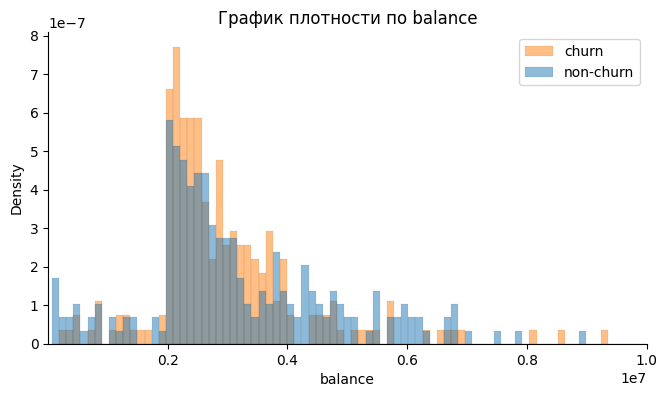

In [25]:
# выделяем vip-клиентов в отдельный датасет
vip = data.query('balance > 2000000 or est_salary > 350000')

# удаляем столбцы, по которым не будем строить графики
columns_2 = vip.drop(['user_id', 'churn', 'balance', 'female', 
                      'male', 'Ростов', 'Рыбинск', 'Ярославль'], axis=1).columns
    
# с помощью цикла построим ряд гистограмм отточных и неотточных клиентов по признакам
for col in columns_2:
    sns.displot(x=col, bins=70,
                hue='churn',
                kde=False, 
                stat="density",
                common_norm=False,
                data=vip,
                legend=False, height=4, aspect=5/3)
    plt.legend(labels=['churn', 'non-churn'])
    plt.title(f'График плотности по {col}', fontsize=12) 
    plt.show();
    
# построим гистограмму по признаку balance
sns.displot(x='balance', 
            bins=1000,
            hue='churn',
            kde=False, 
            stat="density",
            common_norm=False,
            data=vip,
            legend=False, height=4, aspect=5/3)
plt.xlim([3000, 10000000])
plt.legend(labels=['churn', 'non-churn'])
plt.title(f'График плотности по balance', fontsize=12) 
plt.show();    

В основном портреты отточных vip-клиентов схожи со всеми клиентами банка. Выделим только отличия отточности:

- Со скоринговым рейтингом 865-935.
- Преимущественно из филиалов Ростова.
- Имеющие средний баланс счета 2-4 млн. руб.
- С зарплатой от 100 до 360 тыс.руб.

#### Построим графики и посмотрим на различия в группах отточных и неотточных клиентов в разрезе изучаемых признаков

Посмотрим на средний уровень скоринга, баланса на счете и зарплаты у отточных и неотточных в разрезе пола.

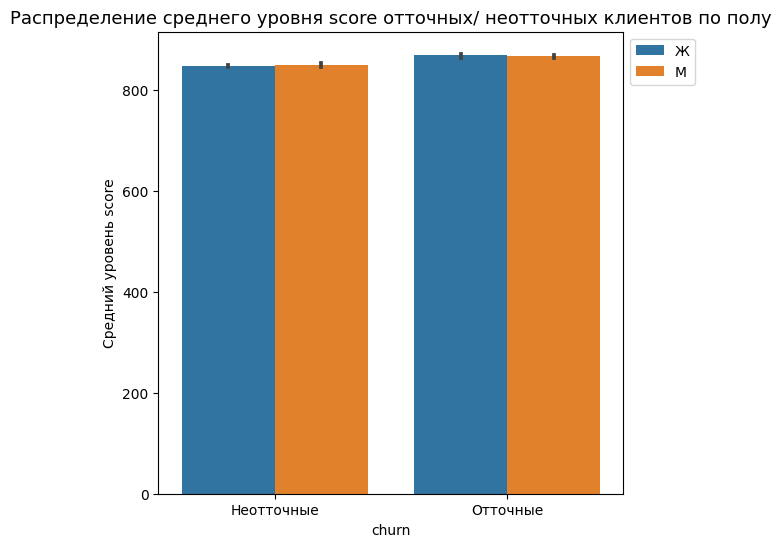

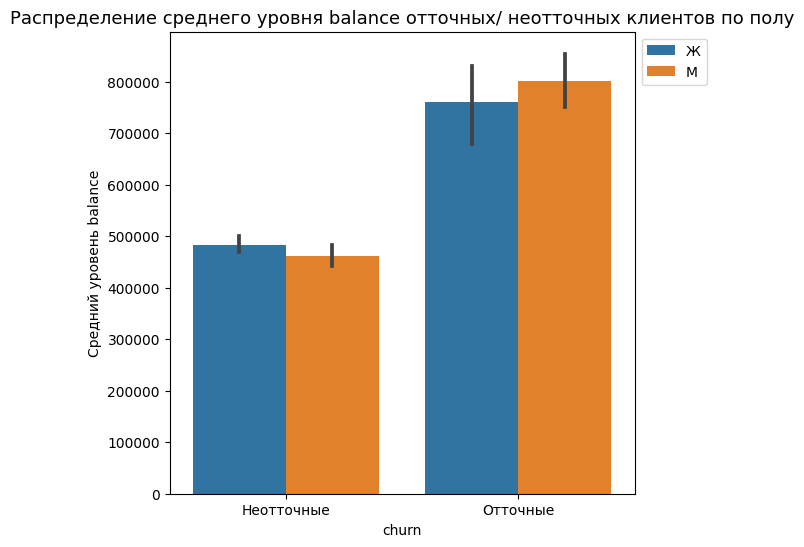

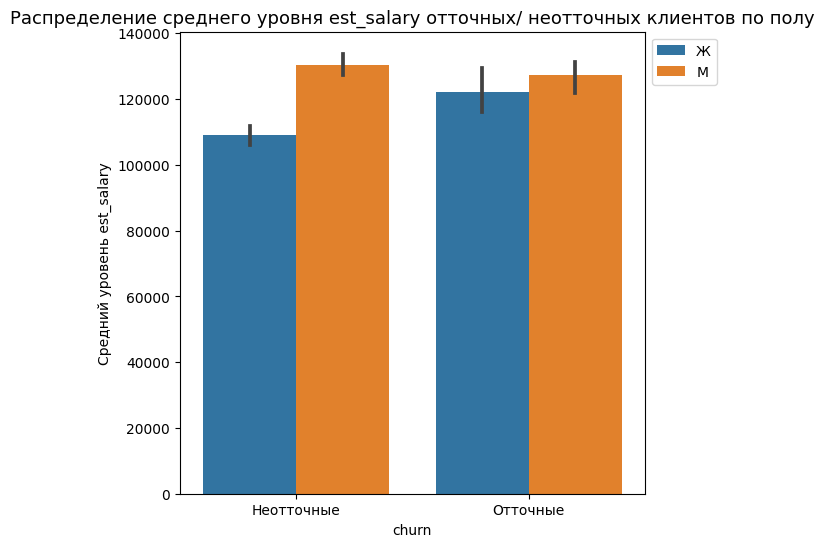

In [26]:
# с помощью цикла построим ряд гистограмм отточных и неотточных клиентов по признакам в разрезе пола
for col in ['score', 'balance', 'est_salary']:
    plt.figure(figsize=(6,6))
    sns.barplot(y=col, x='churn', hue='gender', data=data, estimator=np.median)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.ylabel(f'Средний уровень {col}', fontsize = 10)
    plt.xticks([0, 1],['Неотточные','Отточные'])
    plt.title(f'Распределение среднего уровня {col} отточных/ неотточных клиентов по полу', fontsize=13)
    plt.show()

Что видим:

- Средний уровень скоринга у обоих полов одинаковый, у отточных скоринг чуть выше (850 против 870).
- Клиенты в оттоке мужского пола имеют выше баланс на счете, чем женского (800 т.р. против 760 т.р), а у женщин не в оттоке наоборот выше (480 т.р. против 460 т.р.).
- Доход у мужчин в оттоке и не в оттоке не сильно отличается между собой (127 т.р. против 130 т.р.) и выше, чем у женщин в обоих группах. А вот у женщин в оттоке зарплата выше, чем у неотточных (110 т.р. против 121 т.р.).

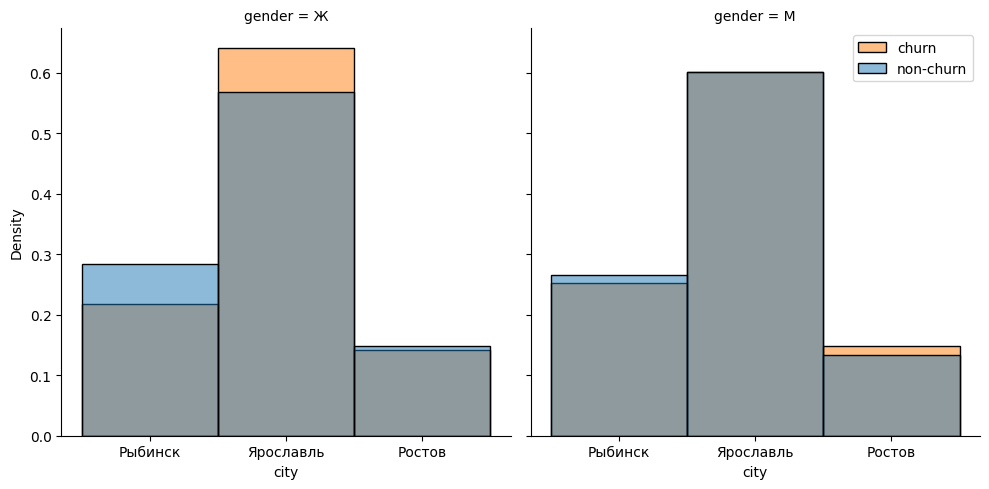

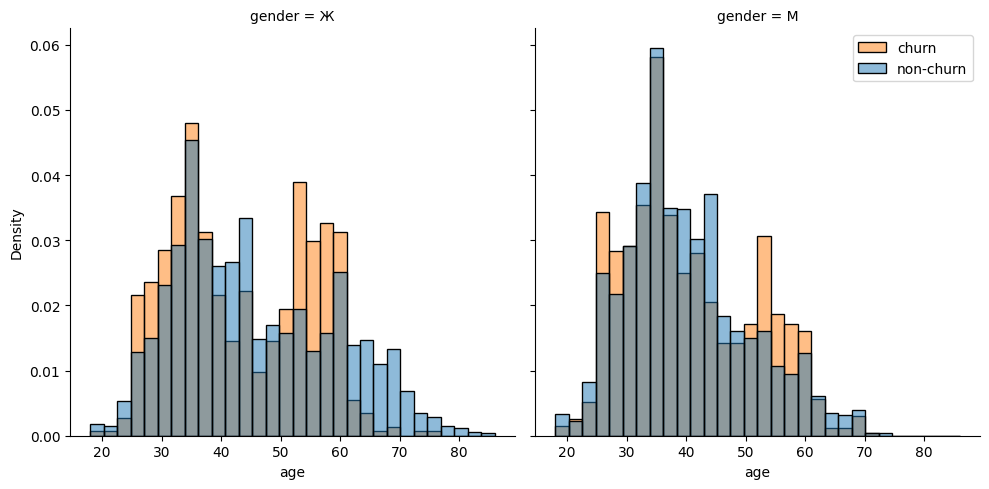

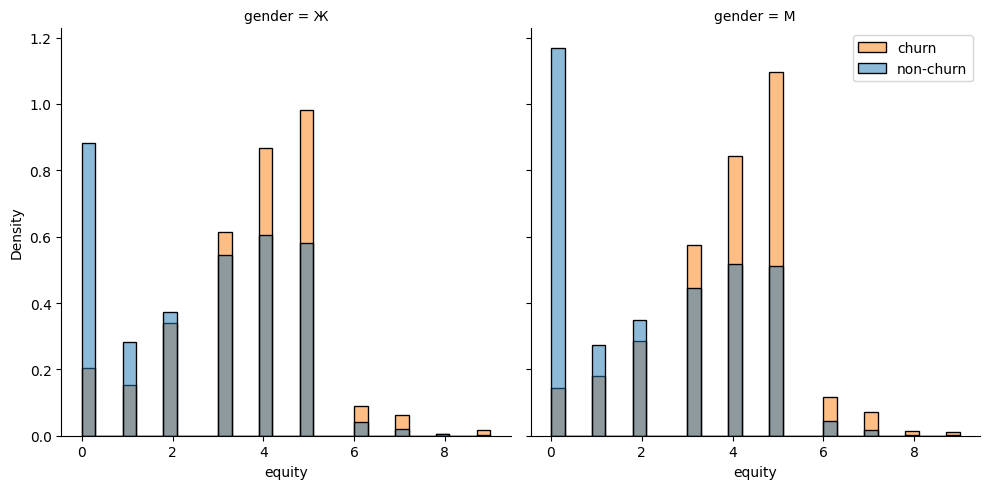

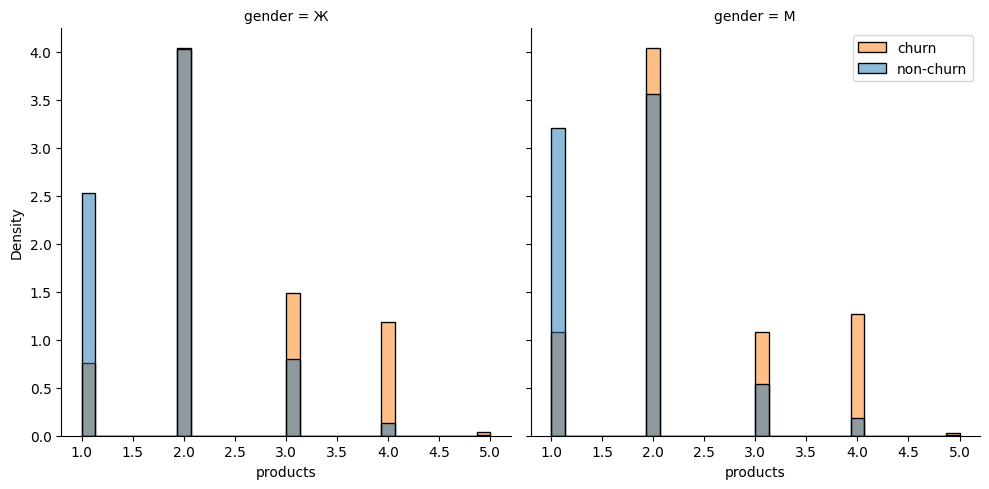

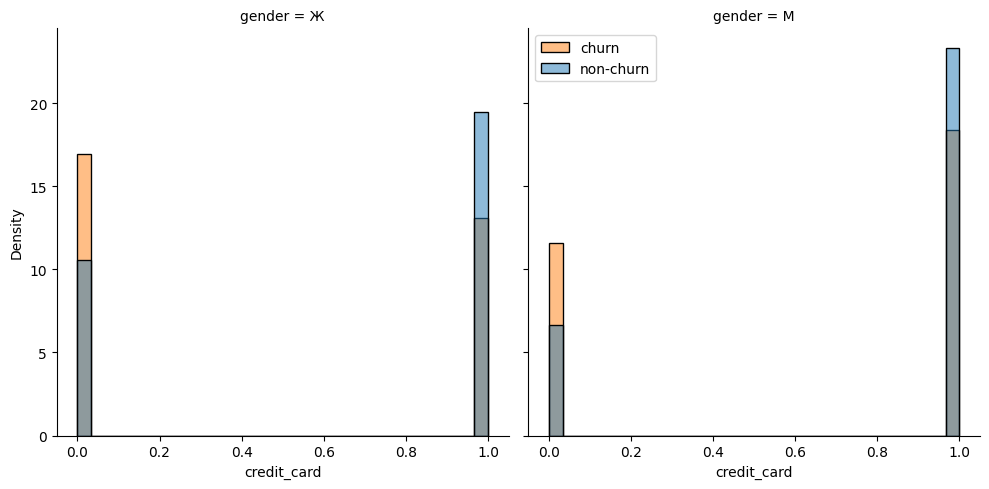

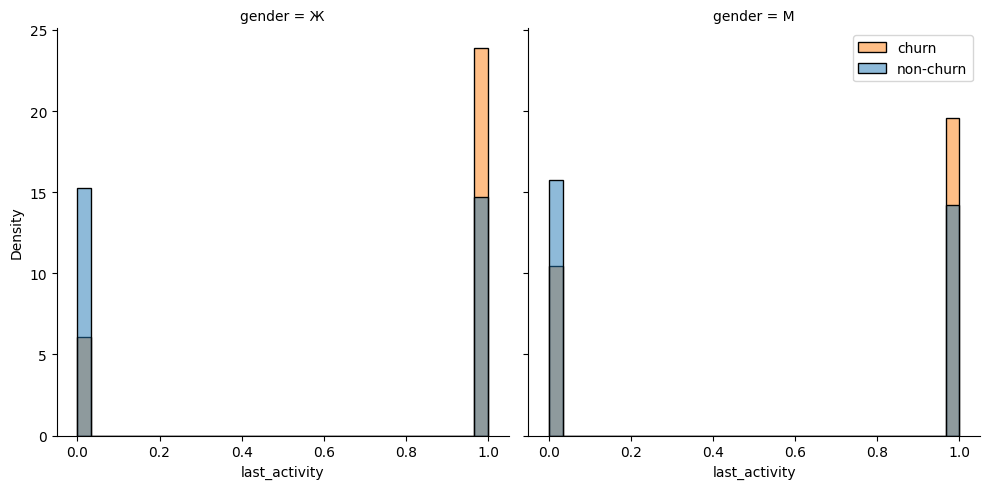

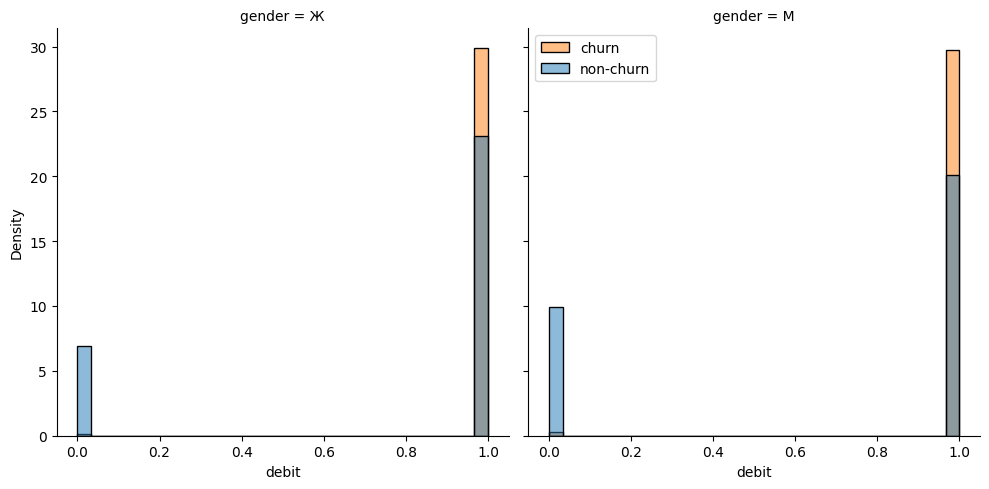

In [27]:
# с помощью цикла построим ряд гистограмм отточных и неотточных клиентов по оставшимся признакам в разрезе пола
for col in ['city', 'age', 'equity', 'products', 'credit_card', 'last_activity', 'debit']:
    sns.displot(x=col, bins=30,
                col='gender', hue='churn',
                kde=False, 
                stat="density",
                common_norm=False,
                data=data,
                legend=False)
    plt.legend(labels=['churn', 'non-churn']) 
    plt.show(); 

Отток выше у:

- Женщин из Ярослявля, а мужчин из Ростова.
- Женщин старшего возраста от 50 до 60 лет, чем у мужчин этого же возраста. Также у молодежи женского пола порог возраста, склонных к оттоку, выше 25-38 лет, у мужчин же он 25-29 лет.
- По рейтингу собственности начиная с 3 баллов и выше мужчины чуть более склонны к оттоку.
- Мужчины с 2 продуктами отточнее, женщины же с 3, далее, чем больше продуктов, тем выше отток, но приблизительно одинаково у обоих полов.
- Женщин без карты, чем у мужчин без нее.
- Активные женщины склоннее к оттоку, чем мужчины.
- Мужчины с дебетовым счем.

Посмотрим на процент отточных клиентов у мужчин и женщин по количеству продуктов и их активности, наличию кредитной карты, дебетовому счету и рейтингу собственности.  

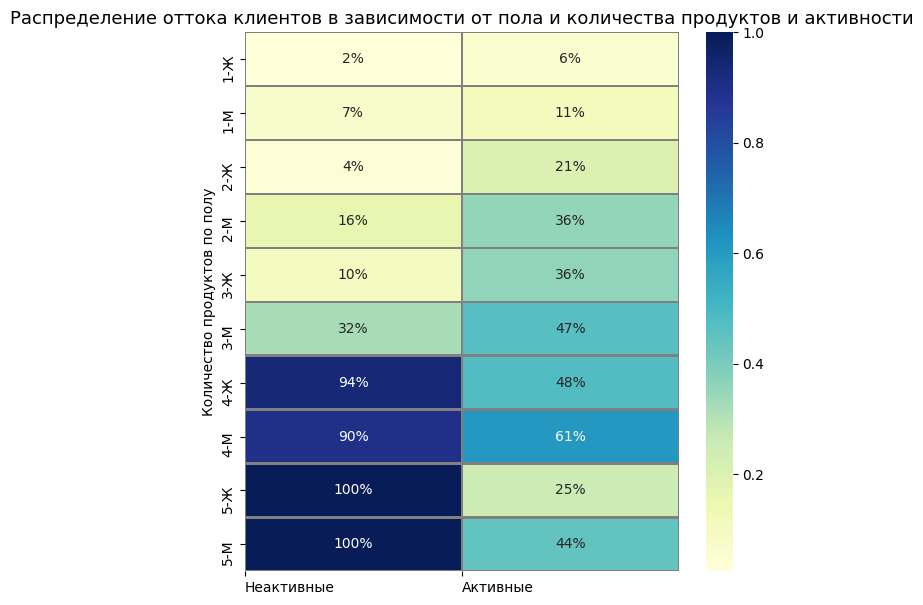

In [28]:
# группируем таблицу по количеству продуктов и по полу и считаем средний уровень оттока по активности
pivot_pgla = data.pivot_table(
    index=['products', 'gender'], columns='last_activity', values='churn', aggfunc='mean'
)

# строим тепловую карту по таблице 
plt.figure(figsize=(7, 7))
plt.title('Распределение оттока клиентов в зависимости от пола и количества продуктов и активности', fontsize=13)
sns.heatmap(pivot_pgla, annot=True, fmt='.0%', linewidths=1, cmap= 'YlGnBu', linecolor='gray')
plt.xticks([0, 1],['Неактивные','Активные'], ha="left")
plt.xlabel('') 
plt.ylabel('Количество продуктов по полу'); 

Из графика:

- Неактивные мужчины и женщины с 5 продуктами 100% отточны.
- Больше всего к оттоку склонны неактивные женщины и мужчины с 4 продуктами (94% и 90%).
- Далее отточны активные мужчины и женщины с 4 продуктами (61% и 48%).
- Самый низкий процент оттоку у неактивных и активных женщин с 1 продуктом (2% и 6%).

В целом прослеживается закономерность у полов, чем больше продуктов, тем выше процент оттока, единственное у женщин и активных и неактивных он ниже, чем у мужчин.

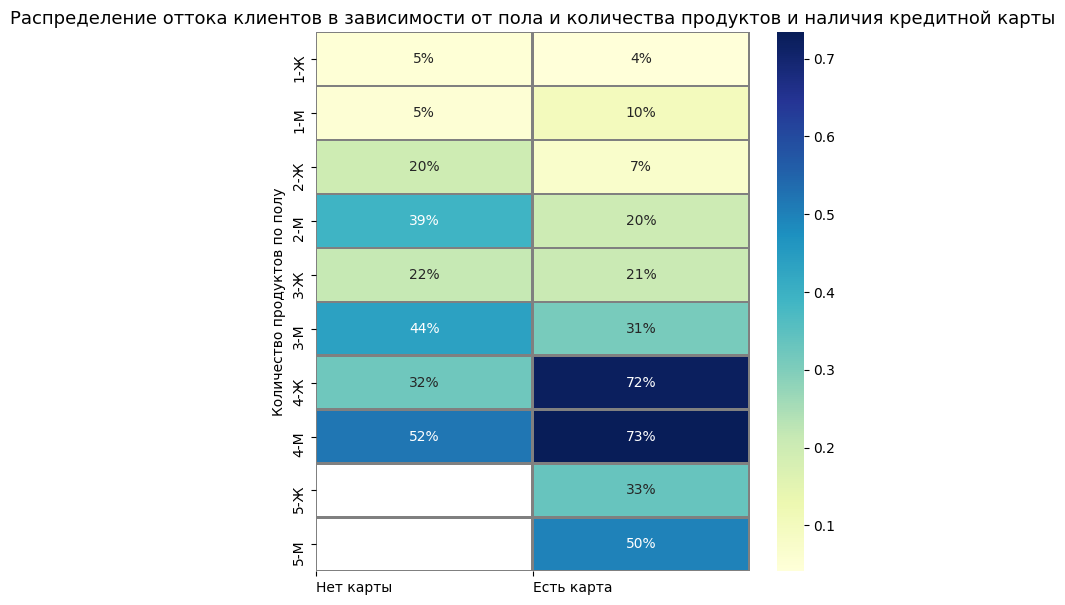

In [29]:
# группируем таблицу по количеству продуктов и по полу и считаем средний уровень оттока по наличию кредитной карты
pivot_cс = data.pivot_table(
    index=['products', 'gender'], columns='credit_card', values='churn', aggfunc='mean'
)

# строим тепловую карту по таблице 
plt.figure(figsize=(7, 7))
plt.title('Распределение оттока клиентов в зависимости от пола и количества продуктов и наличия кредитной карты', 
          fontsize=13)
sns.heatmap(pivot_cс, annot=True, fmt='.0%', linewidths=1, cmap= 'YlGnBu', linecolor='gray')
plt.xticks([0, 1],['Нет карты','Есть карта'], ha="left")
plt.xlabel('') 
plt.ylabel('Количество продуктов по полу'); 

Высокий отток у обоих полов с 4 продуктами (72-73%). В основном у мужчин с картой и без отток выше, чем у женщин в каждой категории по количеству продуктов, причем, чем больше продуктов тем выше отток. Также можно заметить, что у мужчит и женщин без карты с 2-3 продуктами в оттоке выше, чем с картой.

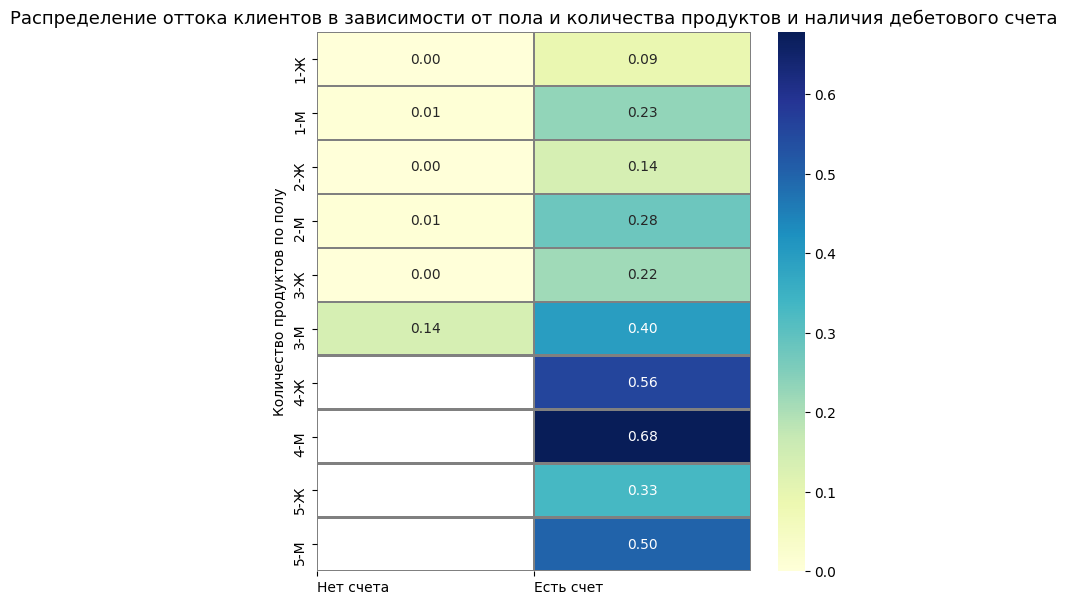

In [30]:
# группируем таблицу по количеству продуктов и по полу и считаем средний уровень оттока по наличию дебетового счета
pivot_debit = data.pivot_table(
    index=['products', 'gender'], columns='debit', values='churn', aggfunc='mean'
)

# строим тепловую карту по таблице 
plt.figure(figsize=(7, 7))
plt.title('Распределение оттока клиентов в зависимости от пола и количества продуктов и наличия дебетового счета', 
          fontsize=13)
sns.heatmap(pivot_debit, annot=True, fmt='.2f', linewidths=1, cmap= 'YlGnBu', linecolor='gray')
plt.xticks([0, 1],['Нет счета','Есть счет'], ha="left")
plt.xlabel('')
plt.ylabel('Количество продуктов по полу'); 

Без наличия дебетового счета только мужчины с 3 продуктами больше всего подвержены оттоку (14%).
А с наличием счета картина повторяется, чем больше продуктов, тем выше отток у обоих полов.

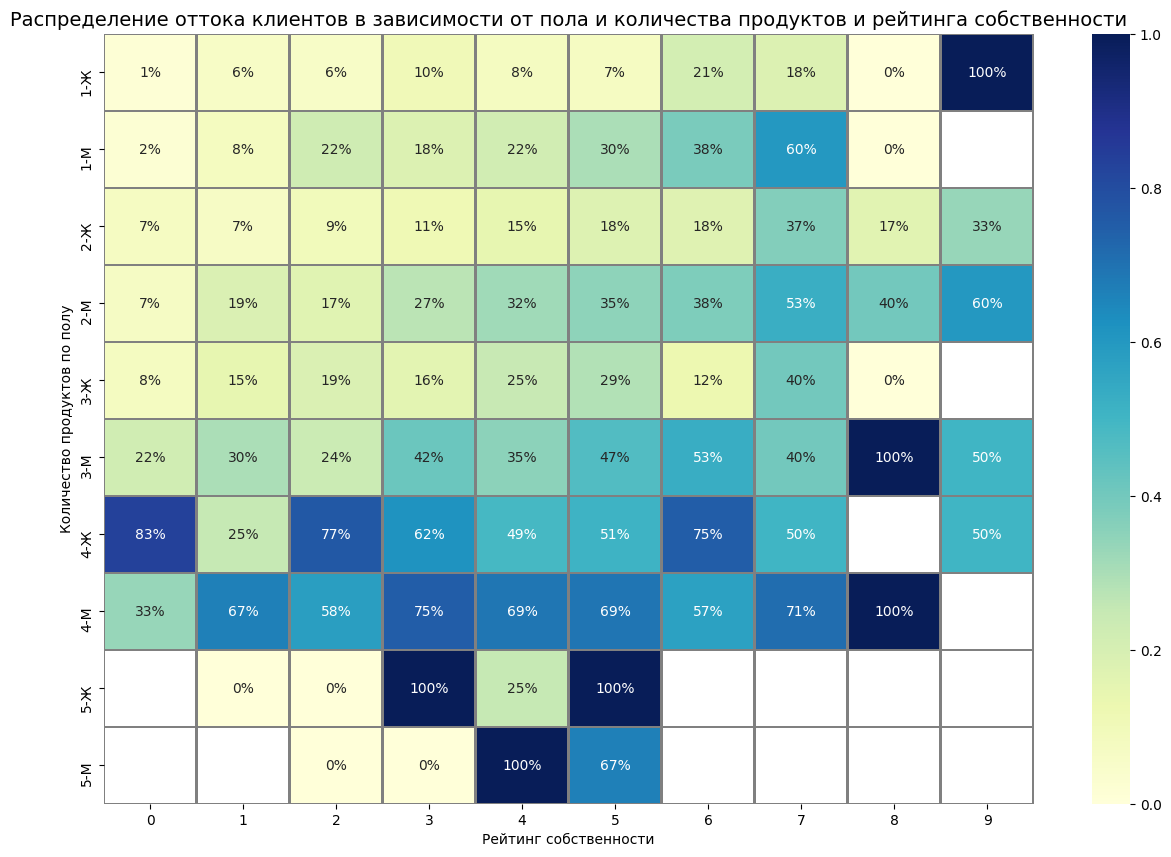

In [31]:
# группируем таблицу по количеству продуктов и по полу и считаем средний уровень оттока по активности
pivot_equity = data.pivot_table(
    index=['products', 'gender'], columns='equity', values='churn', aggfunc='mean'
)

# строим тепловую карту по таблице 
plt.figure(figsize=(15, 10))
plt.title('Распределение оттока клиентов в зависимости от пола и количества продуктов и рейтинга собственности', 
          fontsize=14)
sns.heatmap(pivot_equity, annot=True, fmt='.0%', linewidths=1, cmap= 'YlGnBu', linecolor='gray')
plt.xlabel('Рейтинг собственности') 
plt.ylabel('Количество продуктов по полу'); 

Что видим:

- 100% отточны мужчины с 5 продуктами и рейтингом собственности 4, с 3-4 продуктами и рейтингом 8;
- 100% отточны женщины с 5 продуктами и рейтингами 3 и 5 и с 1 продуктом и рейтингом 9;
- Очень высокий отток (в среднем от 50% и выше) у обоих полов с 4 продуктами и любым рейтингом, исключения женщины с рейтингом 1 (25%) и мужчины с 0 рейтингом (33%);

В целом прослеживается закономерность, что чем больше продуктов и выше рейтинг собственности, то отток выше, причем у мужчин он выше.

### Сравнить средний уровень оттока в целом по банку с уровнями оттока по признакам.

#### Сравним средний уровень оттока в целом по банку с уровнями оттока по городам.

In [32]:
# считаем средний уровень оттока по банку
mean_сhurn = np.round(np.mean(data['churn']), 2)*100
print('Доля среднего уровня оттока по банку', mean_сhurn)

Доля среднего уровня оттока по банку 18.0


In [33]:
# создадим функцию группировки по исследуемом признаку

def groupby(df, column):
    
    # группируем по признаку и считаем общее количество клиентов и количество отточных
    df_churn = df.groupby(column)['churn'].agg(['count', 'sum']).reset_index()
    
    # считаем долю отточных клиентов
    df_churn['share'] = (df_churn['sum']/df_churn['count'])*100
    
    # считаем количество неотточных клиентов
    df_churn['count'] = df_churn['count']-df_churn['sum']
    
    # переименовываем столбцы
    df_churn.columns = [column, 'non_churn', 'churn', 'share']
    
    return df_churn

# создадим функцию вывода графика доли оттока по исследуемом признаку и по среднему уровню оттока в целом по банку

def hist(df, column):
    
    plt.figure(figsize=(7,5))
    plt.barh(df[column], df['share'])
    plt.axvline(x = mean_сhurn, color ="red", linestyle ="--", label = 'mean_сhurn')
    plt.xlabel('Доля отточных')
    plt.title(f'Доля отточных по {column}', fontsize = 15)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.gca().set_yticks(df[column])
    
    return plt.show()

Далее воспользуемся функциями к ряду признаков.

,city,non_churn,churn,share
0,Ростов,1151,265,18.71
1,Рыбинск,2246,436,16.26
2,Ярославль,4758,1117,19.01


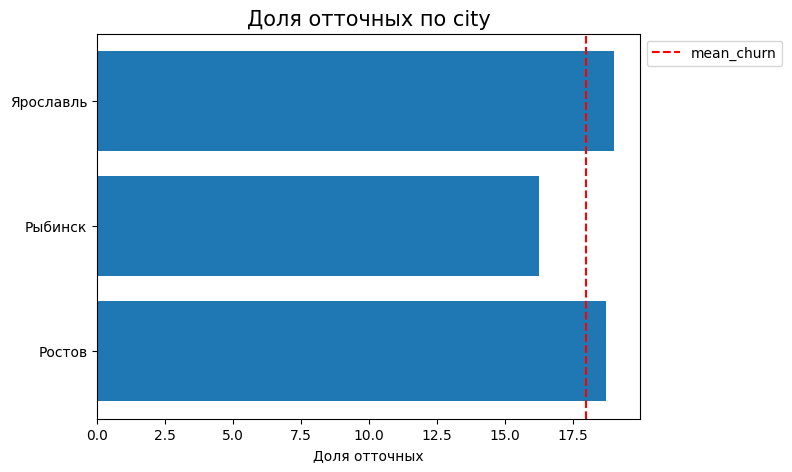

In [34]:
# применим функцию groupby к нашему датафрейму и к исследуемому признаку, 
# сохраним в новой переменной полученный датасет и выведем на экран
c_churn = groupby(data, 'city')
display(c_churn)

# применим функцию hist к полученному датасету и к исследуемому признаку, для вывода графика на экран
hist(c_churn, 'city')

В разрезе города доля отточных клиентов выше среднего уровня оттока в филиалах Ярославля и Ростова, в среднем на 1%, выше всего в Ярославле. В Рыбинске наоборот ниже на 1,7%.

#### Сравним средний уровень оттока в целом по банку с уровнями оттока по полу.

,gender,non_churn,churn,share
0,Ж,4347,635,12.75
1,М,3808,1183,23.70


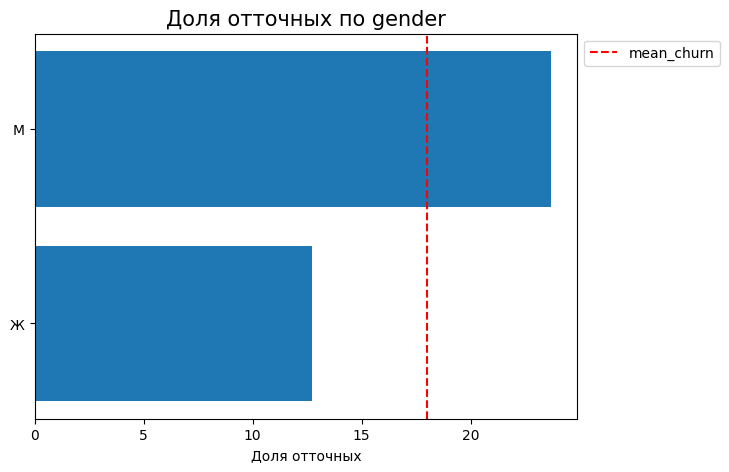

In [35]:
g_churn = groupby(data, 'gender')
display(g_churn)

hist(g_churn, 'gender')

У мужского пола доля отточных клиентов выше среднего уровня оттока в разрезе пола на 5,7%. У женского пола наоборот меньше на 5,3%.

#### Сравним средний уровень оттока в целом по банку с уровнями оттока по возрасту.

Для сравнения оттока по возрасту нам необходимо столбец с данными возрастов разбить на группы. Для этого применим категоризацию.

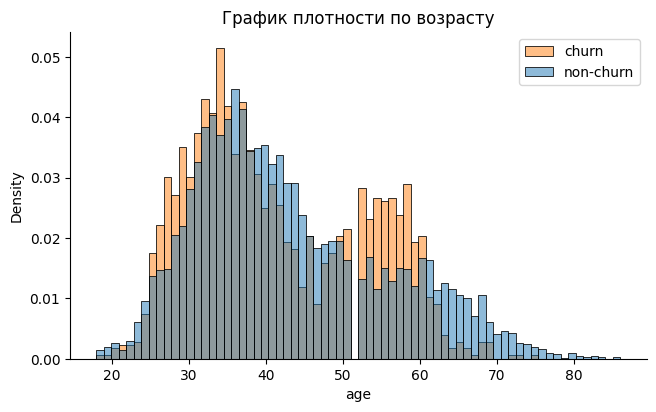

In [36]:
# строим гистограмму распределения отточных и неотточных клиентов по возрасту
sns.displot(x='age', 
            bins=70,
            hue='churn',
            kde=False, 
            stat="density",
            common_norm=False,
            data=data,
            legend=False, height=4, aspect=5/3)
plt.legend(labels=['churn', 'non-churn'])
plt.title(f'График плотности по возрасту', fontsize=12) 
plt.show();

Из графика мы можем выделить следующие возрастные группы клиентов:

- от 18 до 25 лет;
- от 26 до 35 лет;
- от 36 до 49 лет;
- от 50 до 61 лет;
- от 62 года и старше.

In [37]:
# создаем функцию для распределения клиентов по возрастным группам
def age_group(age):
    if age <= 25:
        return '18-25'
    if 26 <= age <= 35:
        return '26-35'
    if 36 <= age <= 49:
        return '36-49'
    if 50 <= age <= 61:
        return '50-61'
    if 62 <= age:
        return '62+'

In [38]:
# создаем новый столбец и применяем функцию
data['age_group'] = data['age'].apply(age_group)
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,debit,female,male,Ростов,Рыбинск,Ярославль,age_group
0,183012,850,Рыбинск,Ж,25,1,"59,214.82",2,0,1,"75,719.14",1,1,1,0,0,1,0,18-25
1,146556,861,Рыбинск,Ж,37,5,"850,594.33",3,1,0,"86,621.77",0,1,1,0,0,1,0,36-49
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.34",0,0,1,0,0,1,0,26-35
3,225363,866,Ярославль,Ж,51,5,"1,524,746.26",2,0,1,"174,423.53",1,1,1,0,0,0,1,50-61
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,"67,353.16",1,1,0,1,0,0,1,26-35


,age_group,non_churn,churn,share
0,18-25,314,62,16.49
1,26-35,2281,634,21.75
2,36-49,3294,588,15.15
3,50-61,1429,486,25.38
4,62+,837,48,5.42


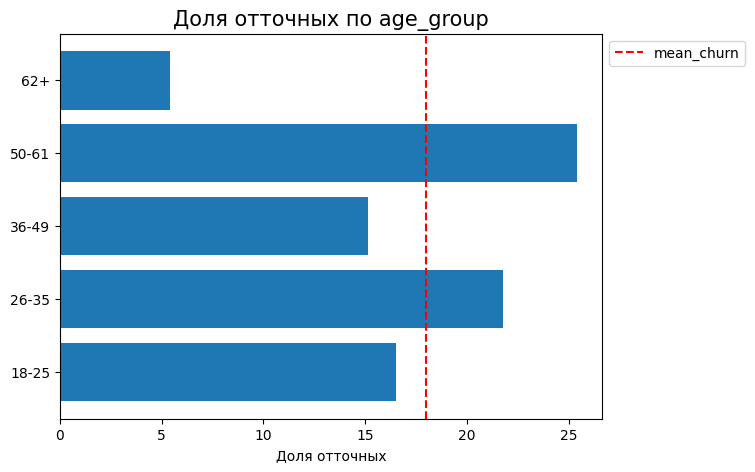

In [39]:
ag_churn = groupby(data, 'age_group')
display(ag_churn)

hist(ag_churn, 'age_group')

В разрезе по возрасту доля отточных клиентов выше среднего уровня оттока в группе 50-61 (на 7% выше), далее выше среднего у группы 25-36 (на 3,7% выше от среднего). В остальных группах доля отточных ниже среднего. Самая низкая доля отточных в самой возрастной группе 62+ меньше 5,5%. В остальных группах разница ниже среднего, округлим, на 1,5-2%.

 #### Сравним средний уровень оттока в целом по банку с уровнями оттока по количеству продуктов.

,products,non_churn,churn,share
0,1,3088,235,7.07
1,2,4141,978,19.11
2,3,741,297,28.61
3,4,174,300,63.29
4,5,11,8,42.11


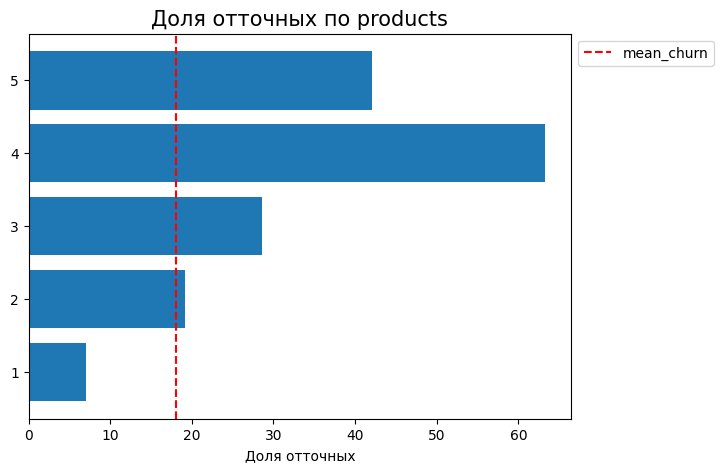

In [40]:
p_churn = groupby(data, 'products')
display(p_churn)

hist(p_churn, 'products')

В разрезе количества продуктов только у клиентов с 1 продуктом видим долю оттока ниже среднего, всего 7%. У всех остальных в оттоке по количеству продуктов доля превышает средний уровень. У многих даже сильно. Самая высокая доля отточных клиентов с 4 продуктами, 63%, это на 45% выше среднего уровня оттока. Далее идут с 5 продуктами (на 24% выше), с 3 (на 10,5% выше), замыкают с 2 продуктами (чуть больше 1% превышение от среднего).

#### Сравним средний уровень оттока в целом по банку с уровнями оттока по количеству баллов собственности.

,equity,non_churn,churn,share
0,0,2486,90,3.49
1,1,680,93,12.03
2,2,885,166,15.79
3,3,1219,321,20.84
4,4,1383,464,25.12
5,5,1339,576,30.08
6,6,103,58,36.02
7,7,43,37,46.25
8,8,11,6,35.29
9,9,6,7,53.85


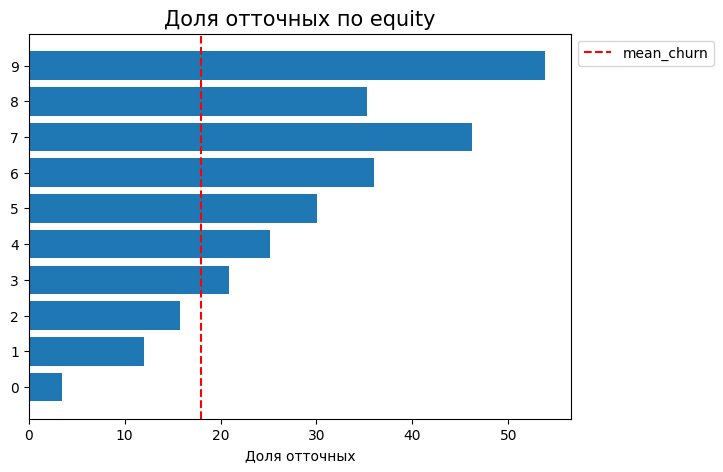

In [41]:
e_churn = groupby(data, 'equity')
display(e_churn)

hist(e_churn, 'equity')

В разрезе рейтинга собственности самая низкая доля у клиентов с 0 рейтингом, всего 3,5% отточных. Далее идут с рейтингами 1 и 2 (12-16%). У остальных доля оттока выше среднего уровня, причем наблюдается тенденция, чем выше рейтинг, тем выше доля отточных. С 3 по 9 доля отточных варьируется от 21 до 54%, что на 3-36% выше среднего. Самый высокий процент отточных у клиентов с рейтингом 9.

#### Сравним средний уровень оттока в целом по банку с уровнями оттока по наличию/ отсутствию кредитной карты.

,credit_card,non_churn,churn,share
0,Нет карты,2374,815,25.56
1,Есть карта,5781,1003,14.78


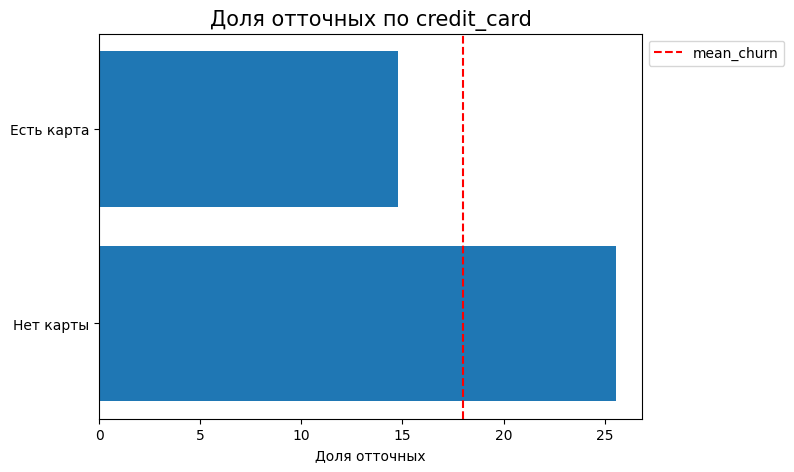

In [42]:
cc_churn = groupby(data, 'credit_card')

# переименуем значения в столбце credit_card и выведем на экран
cc_churn['credit_card'] = cc_churn['credit_card'].map({1:'Есть карта', 0:'Нет карты'})
display(cc_churn)

hist(cc_churn, 'credit_card')

Доля отточных клиентов с кредитной картой на 7,5% выше среднего уровня, а доля клиентов в оттоке, которые не пользуются картой, ниже среднего на 3,2%.

#### Сравним средний уровень оттока в целом по банку с уровнями оттока по активности клиента.

,last_activity,non_churn,churn,share
0,Неактивный,4217,541,11.37
1,Активный,3938,1277,24.49


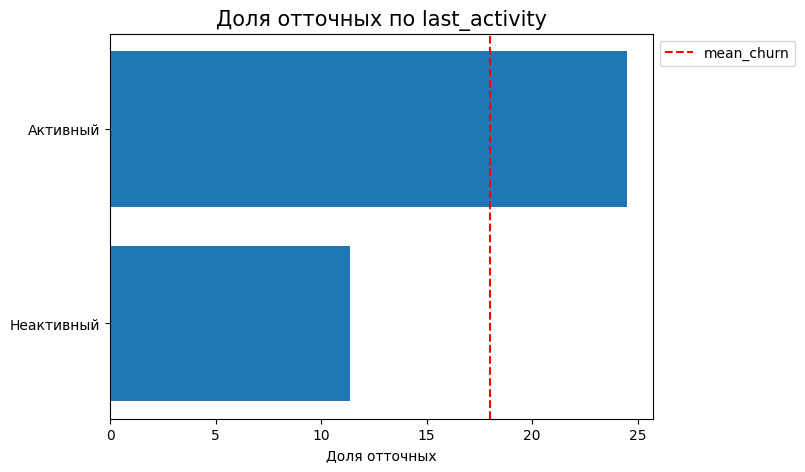

In [43]:
la_churn = groupby(data, 'last_activity')

# переименуем значения в столбце last_activity и выведем на экран
la_churn['last_activity'] = la_churn['last_activity'].map({1:'Активный', 0:'Неактивный'})
display(la_churn)

hist(la_churn, 'last_activity')

Доля активных клиентов в оттоке выше среднего уровня на 6,5%, а неактивных наоборот, ниже среднего на 6,6%.

__Сравним также средний уровень оттока в целом по банку с уровнями оттока по наличию дебетового счета.__

,debit,non_churn,churn,share
0,Нет счета,2266,12,0.53
1,Есть счет,5889,1806,23.47


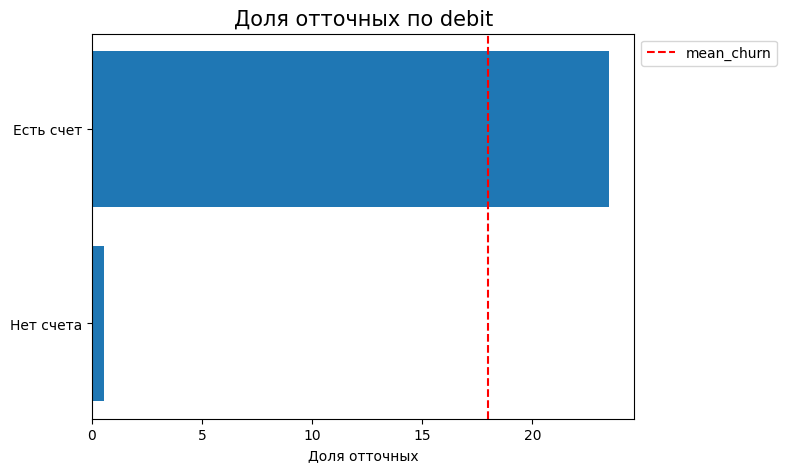

In [44]:
d_churn = groupby(data, 'debit')

# переименуем значения в столбце last_activity и выведем на экран
d_churn['debit'] = d_churn['debit'].map({1:'Есть счет', 0:'Нет счета'})
display(d_churn)

hist(d_churn, 'debit')

Доля клиентов с дебетовым счетом в оттоке выше среднего уровня на 5,5%, а без счета практически отсутствует, в целом составляет меньше 1%.

### Матрица корреляций

Посмотрим на корреляцию признаков между собой. Чтобы увидеть более точную взаимосвязь будем использовать коэффициент корреляции Phi_K, т.к. у него есть ряд преимуществ:
- работает согласованно между категориальными, порядковыми и интервальными переменными;
- фиксирует нелинейную зависимость;
- возвращается к коэффициенту корреляции Пирсона в случае двунаправленного нормального входного распределения.

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'debit', 'female', 'male', 'Ростов', 'Рыбинск', 'Ярославль']


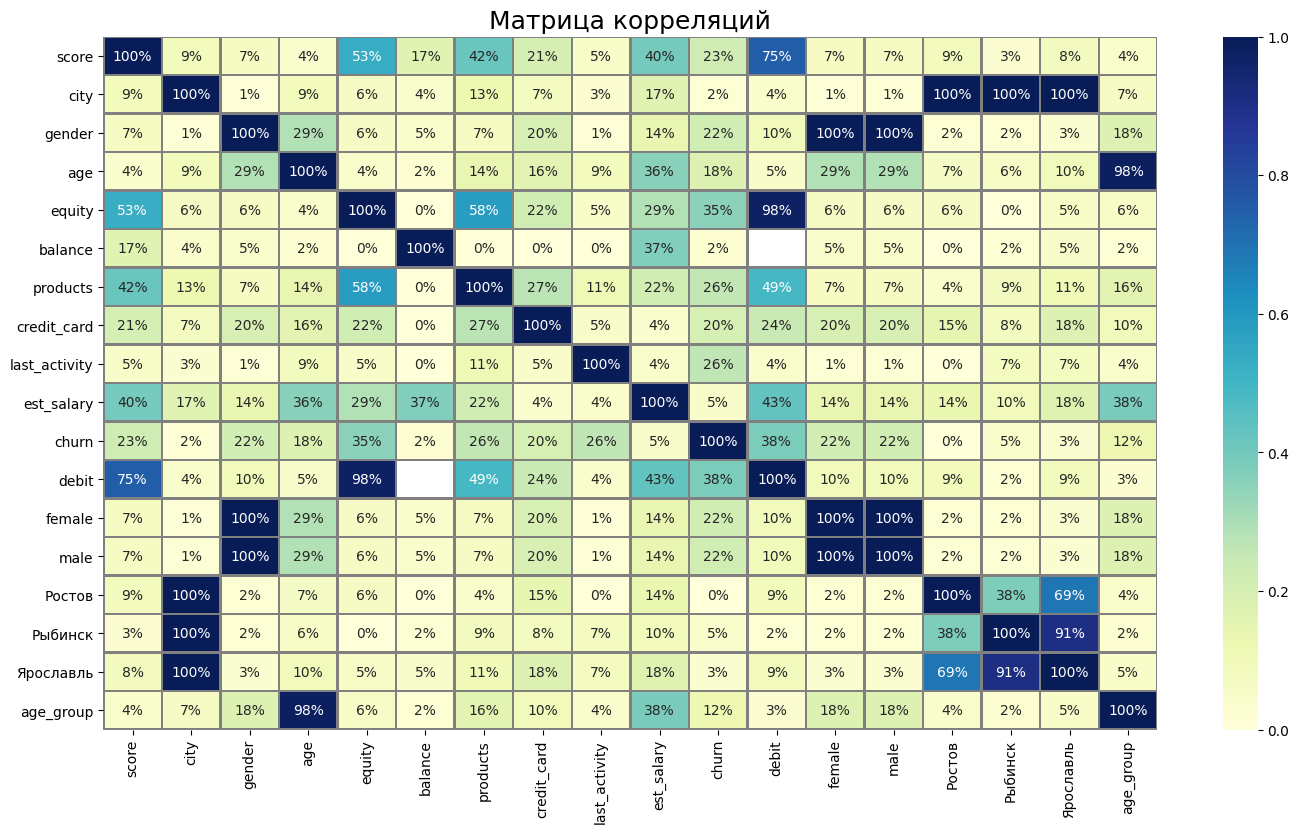

In [45]:
# получаем матрицу корреляции phi_k между всеми переменными
data_corr = data.drop(['user_id'], axis=1).phik_matrix()

# строим тепловую карту матрицы корреляции phi_k
plt.figure(figsize=(17,9))
sns.heatmap(data_corr, annot=True, fmt='.0%', cmap='YlGnBu', linewidths=1, linecolor='gray')
plt.title('Матрица корреляций', fontsize = 18)
plt.show();

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'debit']


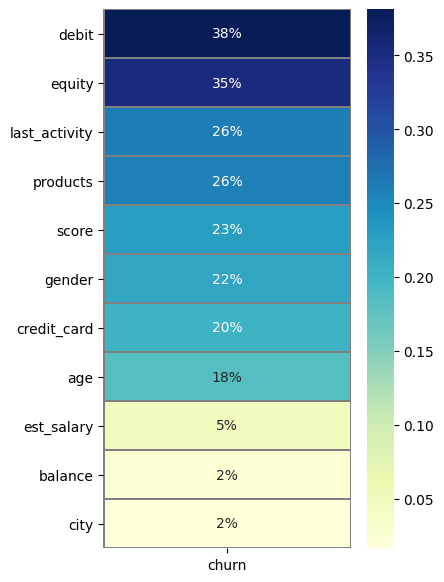

In [46]:
# выведем отдельно столбец корреляции оттока и признаков из матрицы
data_corr = data.drop(['user_id', 'age_group', 'female', 'male', 'Ростов', 'Рыбинск', 'Ярославль'], axis=1).phik_matrix()

plt.figure(figsize=(4,7))
sns.heatmap(data_corr.loc[:,['churn']].drop('churn').sort_values('churn', ascending=False), 
            annot=True, fmt='.0%', cmap='YlGnBu', 
            linewidths=1, linecolor='gray'); 

Для описания корреляции будем использовать шкалу Чеддока. Из графика видим, что между оттоком и признаками присутствует, но слабая или умеренная. Так между городом, балансом на счете, зароботной платой корреляция отсутствует, менее 5%. Слабая корреляция наблюдается у возраста, наличия кредитной карты, пола, скоринга, количества продуктов и клиентской активности, от 18 до 26%. Умеренная присутствует у рейтинга собственности (35%) и наличия дебетового счета (38%), это говорит нам о том, что чем больше рейтинг, тем выше отток и наличие дебетового счета также влияет на отток.

## Проверка статистических гипотез

### Гипотеза о различии доходов у отточных и неотточных клиентов.

__Сформулируем нулевую и альтернативную гипотезы:__  

Нулевая: средние доходы клиентов в оттоке и не в оттоке равны.

Альтернативная: существуют различия между средними доходами клиентов в оттоке и не в оттоке.

In [47]:
# назначим новые переменные и сделаем соответствующие клиентские выборки по анализируемым группам
salary_1 = data.query('churn == 0')['est_salary']
salary_2 = data.query('churn == 1')['est_salary']

# выведем количество клиентов в выборках, средние доходы и разницу средних на экран
print('Количество клиентов не в оттоке:', len(salary_1))
print('Количество клиентов в оттоке:', len(salary_2))
print('Средний доход неотточных клиентов:', salary_1.mean())
print('Средний доход клиентов в оттоке', salary_2.mean())
print(f'Разница средних доходов: {salary_1.mean() / salary_2.mean()-1:.0%}')

Количество клиентов не в оттоке: 8155
Количество клиентов в оттоке: 1818
Средний доход неотточных клиентов: 147674.63788105457
Средний доход клиентов в оттоке 148357.48315731573
Разница средних доходов: -0%


Посмотрим на распределения и выбросы.

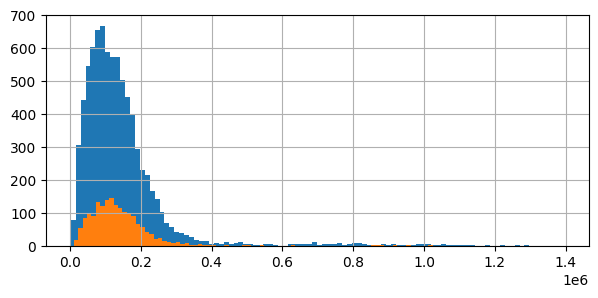

In [48]:
salary_1.hist(bins = 100)
salary_2.hist(bins = 100);

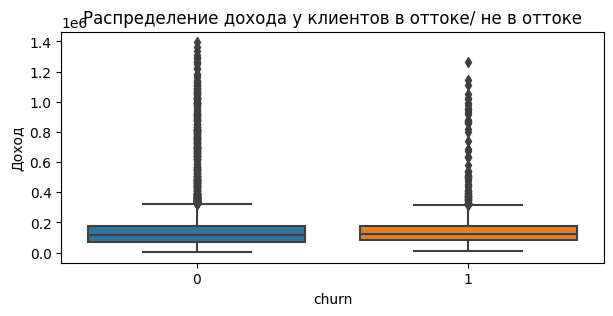

In [49]:
sns.boxplot(y = 'est_salary', data= data.query('churn in [0,1]'), x ='churn').set(
            title="Распределение дохода у клиентов в оттоке/ не в оттоке", 
            ylabel="Доход");

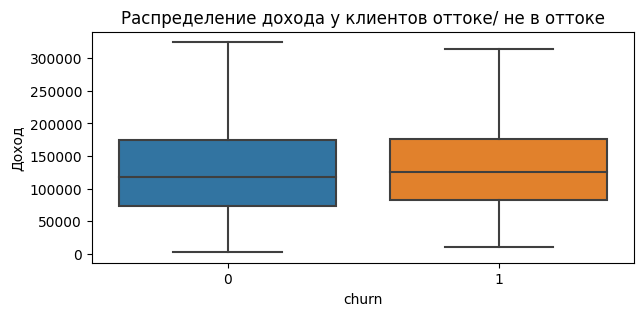

In [50]:
sns.boxplot(y = 'est_salary', data= data.query('churn in [0,1]'), x ='churn', showfliers=False).set(
            title="Распределение дохода у клиентов оттоке/ не в оттоке", 
            ylabel="Доход");

In [51]:
np.percentile(salary_1, [95, 97.5, 99])

array([320670.002 , 565830.2025, 905206.1522])

In [52]:
np.percentile(salary_2, [95, 97.5, 99])

array([304056.793  , 412096.84975, 857278.4372 ])

Видим достаточно большое количество выбросов в обоих выборках, которые влияют на среднее значение. Т.к. будем использовать парметрический метод сравнения средних, то удалим по 5% данных клиентов с очень большими доходами.

In [53]:
# перезапишем выборки с удалением выбросов в новые переменные
s1 = data.query('churn == 0 & est_salary < 320000')['est_salary']
s2 = data.query('churn == 1 & est_salary < 320000')['est_salary']

# выведем количество клиентов в выборках, средние доходы и разницу средних на экран
print('Количество клиентов не в оттоке:', len(s1))
print('Количество клиентов в оттоке:', len(s2))
print('Средний доход неотточных клиентов:', s1.mean())
print('Средний доход клиентов в оттоке', s2.mean())
print(f'Разница средних доходов: {s1.mean() / s2.mean()-1:.0%}')

Количество клиентов не в оттоке: 7743
Количество клиентов в оттоке: 1738
Средний доход неотточных клиентов: 121866.12622368592
Средний доход клиентов в оттоке 128633.06919447641
Разница средних доходов: -5%


Выборки достаточно большие и независимы друг от друга. Для анализа будем использовать t-критерий Стьюдента.

In [54]:
# назначаем уровень статистической значимости
alpha = 0.05

# вызываем метод для проверки гипотезы
results = st.ttest_ind (s1, s2, equal_var = False)

# выведем значение p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

5.520649153332112e-05
Отвергаем нулевую гипотезу


В данном случае отвергаем нулевую гипотезу: существуют различия между средними доходами клиентов в оттоке и не в оттоке. Различие в средних дохода клиентов в оттоке и не в оттоке составило 5%.

### Гипотеза о различии долей клиентов с кредитной картой в оттоке и не в оттоке.

__Сформулируем нулевую и альтернативную гипотезы:__  

Нулевая: доли клиентов с кредитной картой в оттоке и не в оттоке равны.

Альтернативная: доли клиентов с кредитной картой в оттоке и не в оттоке отличаются.

Будем использовать Z-тест. Он позволяет определить, отличаются ли два средних значения совокупности, когда отклонения известны и размер выборки велик.

In [55]:
# число клиентов в группе 1 и группе 2
n_users = np.array([data.loc[data["churn"] == 1, 'user_id'].count(), 
                    data.loc[data["churn"] == 0, 'user_id'].count()])

# число клиентов, открывших дебетовый счет в группе 1 и группе 2
debits = np.array([data.loc[(data["credit_card"] == 1) & (data["churn"] == 1), 'user_id'].count(), 
                    data.loc[(data["credit_card"] == 1) & (data["churn"] == 0), 'user_id'].count()])

In [56]:
# вызываем метод для проверки гипотезы
stat, pval = proportions_ztest(debits, n_users)

# выведем значение p-value на экран 
print(pval)

# условный оператор с выводом строки с ответом
if pval < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

1.3128935583367592e-38
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу: доли клиентов с кредитной картой в оттоке и не в оттоке отличаются. Доля клиентов с кредитной картой в оттоке ниже, чем у неотточных.

## Промежуточные выводы о показателях, влияющих на отток

__Из проделанного анализа можно заключить следующее.__

__Клиенты банка это:__
- Мужчины и женщины в равных долях.
- Средний созраст 42 года.
- Преимущественно из Ярославля (59%), из Рыбинска 27%, из Ростова 14%.
- Средний скоринг 848.
- Со средним рейтингом собственности 2-3 балла.
- Пользующиеся 1-2 продуктами.
- Преимущественно имеющими кредитные карты (68%).
- Преимущественно с имеющемся дебетовым счетом (77%) и балансом на нем в среднем 524 т.р.
- Средне активные (52%).
- Со средним доходом 119 т.р.

__После проведения анализа данных и графиков общий портрет клиентов, склонных к оттоку:__
- Мужчины (65%).
- Средний созраст 43 года, судя из графиков есть 2 самые отточные возрастные группы 26-35 и 50-61 лет.
- Преимущественно из Ярославля (61%), из Рыбинска 24%, из Ростова 15%. В Ростове   отток vip-клиенов  выше, чем в других городах.
- Средний скоринг 863, варьируется в диапазонах 820-900 и 930-945, у vip-клиенов средний 916 и варьируется 865-935..
- Со средним рейтингом собственности 3-4 балла.
- Пользующиеся 2-4 продуктами и имеющими кредитные карты (55%), но у не имеющих карту процент оттока выше.
- Преимущественно с имеющимся дебетовым счетом (77%) и балансом на нем в среднем 784 т.р., диапазон начинается от 700 т.р., у vip-клиенов средний 2,8 млн.р. и варьируется от 2 до 4 млн.р.
- Активные (70%).
- Со средним доходом 125 т.р., у vip-клиенов 231 т.р. Доход варьируется от 100 до 220 т.р, у «богатых» до 360 т.р.

__Доля среднего уровня оттока в целом по банку составила 18%.__

__Портрет клиентов, склонных к оттоку выглядит следующим образом:__

__По половому признаку__<br>
<br>__Мужчины,__ доля оттока составила 23,7%, что выше среднего уровня на 5,7%.
- Преимущественно из Ростова, 
- Возраст 25-28 и 50-60 лет, 
- С рейтингом собственности от 3-х и выше, 
- Пользующиеся 2-мя и более продуктами, 
- Не имеющие кредитную карту, 
- Имеющие дебетовый счет, и балансом на нем в среднем 800 т.р.,
- Активные,
- Средний рейтинг 870,
- Средний доходом 127 т.р.

<br>__Женщины,__ доля оттока составила 12,7%, что ниже среднего уровня на 5,3%.
- Преимущественно из Ярославля, 
- Возраст 25-38 и 50-60 лет, 
- С рейтингом собственности от 3-х и выше, 
- Пользующиеся 3-мя и более продуктами, 
- Не имеющие кредитную карту, 
- Имеющие дебетовый счет, и балансом на нем в среднем 760 т.р.,
- Активные,
- Средний рейтинг 870,
- Средний доходом 121 т.р.

__По продуктам__
- Отток выше среднего у активных клиентов, имеющих 2 продукта и более, у неактивных - мужчин с 2, а женщин с 3 и более. Чем больше продуктов, тем выше отток. 100% отток у клиентов с 5-ю продуктами, с 4-мя 90-94% (причем у женщин выше). 
- Выше среднего уровня отток у клиентов, не имеющих кредитную карту, начинается с 2-х продуктов и больше.  У мужчин с каждым продуктом доля выше, чем у женщин. Клиенты с 5-ю продуктами отсутствуют. А вот у имеющих кредитную карту выше среднего отток у клиентов с 3-5 продуктами, также выше у мужчини начинается с 2-х продуктов. Самый высокий отток у клиентов с 4 продуктами – 72-73%.
- Оттоку без дебетового счета подвержены только мужчины с 3-мя продуктами, но уровень ниже среднего (14%). У имеющих дебетовый счет мужчин отток выше среднего по всем продуктам, у женщин начиная с 3-х продуктов. У мужчин отток выше. С 4-мя продуктами самые высоки доли у мужчин и женщин (68 и 56%).
- По рейтингу собственности закономерность таже, чем больше продуктов и выше рейтинг, тем отток  выше. Мужчины с 5 продуктами и рейтингом 4 и с 3-4 продуктами и рейтингом 8, а женщины с 5 и рейтингом 3 и 5 и с 1 продуктом и рейтингом 9 полностью отточны. Ниже среднего уровня отток либо на уровне с 1-2 продуктами у женщин с рейтингом 0-5, мужчин 0-2. Самые высокоотточные клиенты с 4-мя продуктами и практически с любым рейтингом.

В целом по банку у всех групп по количеству продуктов отток выше среднего, кроме группы с 1 продуктом (всего 7%). Самые высокоотточные с 3-5, от 28% до 63%.


В разрезе __города__ доля отточных клиентов больше в филиалах Ярославля и Ростова, в среднем на 1% выше среднего уровня по банку. В Рыбинске ниже на 1,7%.

В разрезе __возраста__ доли отточных расзбились по возрастным группам:
- 50-61 год (на 7% выше среднего), самая высокотточная.
- 25-35 лет (на 3,7% выше среднего). 
- 18-25 лет (на 1,5% ниже от среднего).  
- 36-49 лет (на 2,8% ниже от среднего).  
- 62+ лет (на 12,5% ниже от среднего), самая низкоотточная.

В разрезе __рейтинга собственности__ самая отток ниже среднего у рейтинга 2-2, у остальных выше. С рейтингом 6-9 отток выше среднего по банку. Самый высокий отток у 7 и 9 (46 и 54%).

Доля отточных клиентов с __кредитной картой__ на 3,2% ниже среднего уровня, а доля клиентов в оттоке, которые не пользуются картой, выше среднего на 7,5%.

Доля __активных__ клиентов в оттоке выше среднего уровня на 6,5%, а неактивных наоборот, ниже среднего на 6,6%.

Доля клиентов с __дебетовым счетом__ в оттоке выше среднего уровня на 5,5%, а без счета практически отсутствует, в целом составляет меньше 1%.

__Корреляция__ между оттоком и признаками присутствует, но слабая или умеренная. Между городом, балансом на счете, заработной платой менее 5%. Слабая корреляция наблюдается у возраста, наличия кредитной карты, пола, скоринга, количества продуктов и клиентской активности, от 18 до 26%. Умеренная присутствует у рейтинга собственности (35%) и наличия дебетового счета (38%), это говорит нам о том, что чем больше рейтинг, тем выше отток и наличие дебетового счета также влияет на отток.

В результате проверки __гипотез__ удалось выяснить, что:
- существует разница между средними доходами клиентов в оттоке и не в оттоке. Разница составила 4%, у клиентов в оттоке доходы выше;
- доли клиентов с дебетовым счетом в оттоке и не в оттоке отличаются. Доля в оттоке выше.

                               Таблица взаимосвязи оттока и признаков

|Показатель |Сравнение портретов/гипотезы|Корреляции|Распределения в разрезе оттока|
| :--- | :---: | :---: | :--- |
|debit      |есть связь         |умеренная |отток со счетом 24,5%     |
|score      |есть связь         |слабая    |отточный интервал с 820 по 945 |
|city       |нет связи          |отсутствует| -----------                  |
|gender     |есть связь         |слабая    |мужчины 23,7% / женщины 12,7%|
|age        |есть связь         |слабая    |отточный интервал 26-35 лет и 50-61 год|
|equity     |есть связь         |умеренная |отточный интервал от 3 до 9 баллов|
|balance    |есть связь         |отсутствует|отточный интервал 700т. - 2млн.р.|
|products   |есть связь         |слабая    |отточный интервал от 2 до 5 продуктов|
|credit_card|есть связь         |слабая    |без карты 25,5% / с картой 14,7%|
|last_activity|есть связь       |слабая    |активные 24,5% / неактивные 11,3%|
|est_salary |есть связь         |отсутствует|отточный интервал 100 - 360 т.р.|

## Сегментация клиентов и их приоритизация

По итогам проведенного анализа и проверки гипотез выделим несколько высокоотточных сегментов пользователей.

В качестве критериев для выделения __Сегмента №1__ выделим следующие параметры:

- пол - мужской;
- возраст - старше либо равен 50 годам;
- рейтинг собственности - от 3-х и выше.

In [57]:
print('Сегмент №1')
s_1 = (
    data.query('gender=="М" and equity>=3 and age_group=="50-61"')
    .agg({"churn":"mean", "user_id":"count", "balance":"median"})
    .reset_index().T
)
s_1

Сегмент №1


,0,1,2
index,churn,user_id,balance
0,0.46,492.00,"902,880.81"


В качестве критериев для выделения __Сегмента №2__ выделим следующие параметры:

- наличие кредитной карты - отсутствует;
- доход - от 120000 и выше;
- баланс счета - от 700 т.р.

In [58]:
print('Сегмент №2')
s_2 = (
    data.query('credit_card==0 and est_salary>120000 and balance>700000')
    .agg({"churn":"mean", "user_id":"count", "balance":"median"})
    .reset_index().T
)
s_2

Сегмент №2


,0,1,2
index,churn,user_id,balance
0,0.49,745.00,"1,385,265.72"


В качестве критериев для выделения __Сегмента №3__ выделим следующие параметры:

- пол - женский;
- возрастная группа - 26-35 лет;
- клиентская активность - активный.

In [59]:
print('Сегмент №3')
s_3 = (
    data.query('gender=="М" and last_activity==1 and age_group=="26-35"')  
    .agg({"churn":"mean", "user_id":"count", "balance":"median"}).reset_index().T
)
s_3

Сегмент №3


,0,1,2
index,churn,user_id,balance
0,0.35,916.00,"468,057.66"


В качестве критериев для выделения __Сегмента №4__ выделим следующие параметры:

- баланс счета - от 700 т.р;
- количество продуктов - от 3-х и больше;
- рейтинг собственности - от 3-х и выше.

In [60]:
print('Сегмент №4')
s_4 = (
    data.query('balance>700000 and products>=3 and equity>=3')
    .agg({"churn":"mean", "user_id":"count", "balance":"median"})
    .reset_index().T
)
s_4

Сегмент №4


,0,1,2
index,churn,user_id,balance
0,0.53,701.00,"1,333,042.72"


В качестве критериев для выделения __Сегмента №5__ выделим следующие параметры:

- скоринг - от 820 и выше;
- наличие кредитной карты - отсутствует;
- клиентская активность - активный.

In [61]:
print('Сегмент №5')
s_5 = (
    data.query('score>=820 and credit_card==0 and last_activity==1')
    .agg({"churn":"mean", "user_id":"count", "balance":"median"}).reset_index().T
)
s_5

Сегмент №5


,0,1,2
index,churn,user_id,balance
0,0.44,"1,270.00","792,560.07"


В качестве критериев для выделения __Сегмента №6__ выделим следующие параметры:

- город - Ярославль;
- Количество продуктов - от 3-х и больше;
- рейтинг собственности - от 3-х и выше.

In [62]:
print('Сегмент №6')
s_6 = (
    data.query('Ярославль==1  and products>=3 and equity>=3')
    .agg({"churn":"mean", "user_id":"count", "balance":"median"})
    .reset_index().T
)
s_6

Сегмент №6


,0,1,2
index,churn,user_id,balance
0,0.44,887.00,"887,983.06"


В качестве критериев для выделения __Сегмента №7__ выделим следующие параметры:

- наличие дебетового счета - есть;
- доход - от от 120 т.р.;
- возрастная группа - 50-61 год.

In [63]:
print('Сегмент №7')
s_7 = (
    data.query('debit==1 and est_salary>120000 and age_group=="50-61"')
    .agg({"churn":"mean", "user_id":"count", "balance":"median"})
    .reset_index().T
)
s_7

Сегмент №7


,0,1,2
index,churn,user_id,balance
0,0.39,511.00,"924,560.51"


__Приоритизируем высокоотточные сегменты.__

In [64]:
# создаем копию датафрейма s_1, по которому будем объединять остальные датафреймы с сегментами
all_segment = s_1.copy()

# создаем список датафреймов с сегментами
dfs = [s_2, s_3, s_4, s_5, s_6, s_7]

# с помощью цикла объединим все датафпеймы в один
for df in dfs:
    all_segment = all_segment.merge(df, 'outer')

# удалим первую строку    
all_segment = all_segment.drop(index=0)  

# переименуем столбцы
all_segment = all_segment.rename(columns={0 : 'share_churn', 1 : 'segment_size', 2 : 'mean_balance'})

# создадим 2 новых столбца с названием сегментов и с характеристикой формирования сегмента, выставим их первыми в таблице 
all_segment.insert(0, "segment", ['s_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7'], True)

all_segment.insert(1, "characteristic", ['gender=="М" and equity>=3 and age_group=="50-61"', 
                                  'credit_card==0 and est_salary>120000 and balance>700000', 
                                  'gender=="М" and last_activity==1 and age_group=="26-35"', 
                                  'balance>700000 and products>=3 and equity>=3', 
                                  'score>=820 and credit_card==0 and last_activity==1', 
                                  'Ярославль==1  and products>=3 and equity>=3', 
                                  'debit==1 and est_salary>120000 and age_group=="50-61"'], True)


In [65]:
# отсортируем по убыванию доли оттока
all_segment = all_segment.sort_values(by='share_churn', ascending=False)

# приведем некоторые столбцы к соответствующему типу данных
all_segment['segment_size'] = all_segment['segment_size'].astype(int)
all_segment['share_churn'] = all_segment['share_churn'].astype(float)

# выведем на экран
all_segment

,segment,characteristic,share_churn,segment_size,mean_balance
4,s_4,balance>700000 and products>=3 and equity>=3,0.53,701,"1,333,042.72"
2,s_2,credit_card==0 and est_salary>120000 and balance>700000,0.49,745,"1,385,265.72"
1,s_1,"gender==""М"" and equity>=3 and age_group==""50-61""",0.46,492,"902,880.81"
6,s_6,Ярославль==1 and products>=3 and equity>=3,0.44,887,"887,983.06"
5,s_5,score>=820 and credit_card==0 and last_activity==1,0.44,1270,"792,560.07"
7,s_7,"debit==1 and est_salary>120000 and age_group==""50-61""",0.39,511,"924,560.51"
3,s_3,"gender==""М"" and last_activity==1 and age_group==""26-35""",0.35,916,"468,057.66"


У всех сегментов отточность выше среднего уровня более, чем в 2 раза, кроме сегмента №3 (ниже, чем в 2 раза). Выделим 3 наиболее высокоотточных сегмента, в которых характеристики не повторяются, это сегменты № 4, 5 и 7. В выбранных сегментах средний баланс на счете у клиентов выше среднего у отточных, и минимум в 1,5 раза выше среднего в целом по банку.

In [66]:
high_churn = all_segment.query('segment==["s_4","s_5","s_7"]') 
display(high_churn)

,segment,characteristic,share_churn,segment_size,mean_balance
4,s_4,balance>700000 and products>=3 and equity>=3,0.53,701,"1,333,042.72"
5,s_5,score>=820 and credit_card==0 and last_activity==1,0.44,1270,"792,560.07"
7,s_7,"debit==1 and est_salary>120000 and age_group==""50-61""",0.39,511,"924,560.51"


Получили достаточный результат отточных в 3-х сегментах для работы маркетингу.

## Итоговые выводы и рекомендации для заказчика по каждому сегменту

По факту проведенного анализа можно заключить, что на отток клиентов в банке больше всего влияют следующие признаки:
- количество продуктов;
- клиентская активность;
- оценка собственности;
- наличие дебетового счета.

В связи с этим мы выделили несколько высокоотточных сегментов по этим признакам, по которым хотим предложить следующие рекомендации по минимизации оттока.  

Для __Сегмента №4__:

- баланс счета - от 700 т.р.;
- количество продуктов - от 3-х и больше;
- рейтинг собственности - от 3-х и выше.

_Рекомендации:_<br>
- Предложить инвестиционнные программы с высоким процентом и краткосрочным периодом или инвестировать в такой инструмент, как золото.
- Т.к. у клиентов большое число продуктов, которыми они пользуются, причина кроется в трудностях оплаты кредитов, предложить реструктузизацию для снижения финансовой нагрузки, кредитные каникулы.
- Предложить специальные условия по страхованию объектов собственности;

Для __Сегмента №5__:

- скоринг - от 820 и выше;
- наличие кредитной карты - отсутствует;
- клиентская активность - активный.

_Рекомендации:_<br>
- Предлагать уникальные продукты и индивидуальные условия для клиентов с высоким скорингом, т.к. они явно платежеспособны и ответственны по своим обязательствам. Например, субсидированная ипотека без первоначального взноса по минимальному пакету документов.
- Предлагать кредитные карты с низкой процентной ставкой, предоставлением рассрочки до 3-х месяцев, начислением кэшбека за покупки и скидками у партнеров.
- Повысить клиентоориентированность персонала банка путем проведения тренингов по увеличению профессиональных навыков и повышению квалификации. Поменять систему мотивации персонала в работе по удержанию клиентов банка.

Для __Сегмента №7__:

- наличие дебетового счета - есть;
- доход - от от 120 т.р.;
- возрастная группа - 50-61 год.

_Рекомендации:_<br>
- Повысить условия обслуживания счетов путем начисления повышенного процента.
- Предлагать зарплатные проекты с интересными программами, кэшбеком, мобильным банком.
- Предлагать крупный процент по вкладам с безлимитным пополнением и снятием, особенно для клиентов пенсионного возраста. 

В целом, проанализировать конкурентов, к которым уходят клиенты, с целью изучения рынка услуг и продуктов, заинтересовавших клиентов, которых нет в банке. В дальнейшем разработка и внедрение новых продуктов и услуг с более интересными предложениями.